# COREFL: Corpus of English as a Foreign Language

http://corefl.learnercorpora.com/user_guide/corpus_design

## Set up

### Requirements

#### Install

In [1]:
#python
#jupyternotebook

In [2]:
!pip install textstat
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install nltk
!pip install xgboost
!pip install pandas matplotlib networkx

#### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
# import xgboost as xgb
import networkx as nx

### Import Data

In [4]:
lc = pd.read_csv("texts.csv", delimiter='	')

lc.head(2)

Subcorpus              Filename  Year data collection  \
0  Learners  DE_SP_B1_26_13_13_TM                  2016   
1  Learners  DE_WR_B1_26_13_13_TM                  2016   

  Placement test score (raw)  Placement test score (%)  \
0                    30 / 60                      50.0   
1                    30 / 60                      50.0   

               Proficiency   Sex   Age School/University/Institution  \
0  B1 (lower intermediate)  Male  26.0                        Bremen   
1  B1 (lower intermediate)  Male  26.0                        Bremen   

                              Major  ...  \
0  BiPEB: English Speaking Cultures  ...   
1  BiPEB: English Speaking Cultures  ...   

  Proficiency (self-assessment) in additional language writing   Medium  \
0                                A1 (lower beginner)             Spoken   
1                                A1 (lower beginner)            Written   

  Task number Task title     Writing/audio details  \
0          13   13. Frog  spoken_offline_classroom   
1          13   13. Frog            written_online   

   Minutes taken to complete the task  Where the task was done Resources used  \
0                                 NaN         Inside classroom            NaN   
1                                 NaN         Inside classroom            NaN   

                                                Text Original text  
0  One day Tommy found a frog in a forest and bro...           NaN  
1  One day Tommy found a frog in the Forest. He b...           NaN  

[2 rows x 41 columns]

## Exploratory Data Analysis

### Basic properties of data


In [5]:
lc.dtypes

Subcorpus                                                          object
Filename                                                           object
Year data collection                                                int64
Placement test score (raw)                                         object
Placement test score (%)                                          float64
Proficiency                                                        object
Sex                                                                object
Age                                                               float64
School/University/Institution                                      object
Major                                                              object
Year at university/school                                          object
L1                                                                 object
Father's native language                                           object
Mother's native language              

In [6]:
for column in lc.columns:
    if lc[column].dtype == 'object' or pd.api.types.is_categorical_dtype(lc[column]):
        print(f"Value counts for")
        print(lc[column].value_counts())
        print("Numberof nans: " + str( lc[column].isna().sum() ) )
        print("-----")


Value counts for
Subcorpus
Learners    1810
Name: count, dtype: int64
Numberof nans: 0
-----
Value counts for
Filename
ES_WR_B2_20_14_3_LMC      2
ES_WR_B1_17_12_3_PFG      2
DE_WR_C2_19_11_14_JW      2
DE_SP_B1_26_13_13_TM      1
ES_WR_B1_18_14_14_ARF     1
                         ..
ES_WR_A1_13_0_13_AMR      1
ES_WR_A1_12_8_13_LVB      1
ES_WR_A1_28_10_14_SCM     1
ES_WR_A1_26_0.6_14_WB     1
ES_WR_C2_27_13_14_JACC    1
Name: count, Length: 1807, dtype: int64
Numberof nans: 0
-----
Value counts for
Placement test score (raw)
46 / 60     63
49 / 60     61
50 / 60     59
48 / 60     54
57 / 60     49
            ..
92 / 120     1
91 / 120     1
72 / 120     1
82 / 120     1
1 / 120      1
Name: count, Length: 149, dtype: int64
Numberof nans: 5
-----
Value counts for
Proficiency
B2 (upper intermediate)    398
C1 (lower advanced)        379
B1 (lower intermediate)    317
A2 (upper beginner)        295
A1 (lower beginner)        231
C2 (upper advanced)        190
Name: count, dtype: int6

/tmp/ipykernel_3336/45863905.py:2: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if lc[column].dtype == 'object' or pd.api.types.is_categorical_dtype(lc[column]):
/tmp/ipykernel_3336/45863905.py:2: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if lc[column].dtype == 'object' or pd.api.types.is_categorical_dtype(lc[column]):
/tmp/ipykernel_3336/45863905.py:2: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if lc[column].dtype == 'object' or pd.api.types.is_categorical_dtype(lc[column]):
/tmp/ipykernel_3336/45863905.py:2: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if lc[column].dtype == 'object' or pd.api.types.is

In [7]:
for column in lc.columns:
    if lc[column].dtype == 'int64' or lc[column].dtype == 'float64':
        print(f"Value counts for")
        print(lc[column].value_counts())
        print("Number of nans: " + str( lc[column].isna().sum() ) )
        print("-----")


Value counts for
Year data collection
2012    427
2018    414
2019    313
2016    281
2020    181
2017    139
2013     49
2021      6
Name: count, dtype: int64
Number of nans: 0
-----
Value counts for
Placement test score (%)
76.7    64
81.7    62
83.3    62
80.0    55
78.3    54
        ..
6.7      1
75.8     1
79.2     1
14.2     1
84.2     1
Name: count, Length: 105, dtype: int64
Number of nans: 0
-----
Value counts for
Age
21.0    276
19.0    204
20.0    194
18.0    161
22.0    154
23.0    101
16.0     95
15.0     92
14.0     84
17.0     71
13.0     70
24.0     59
12.0     42
25.0     40
26.0     26
28.0     17
27.0     16
29.0     11
33.0      9
36.0      8
41.0      6
52.0      6
31.0      6
46.0      4
57.0      4
50.0      4
48.0      4
35.0      4
40.0      4
37.0      3
60.0      3
32.0      3
53.0      3
49.0      2
45.0      2
30.0      2
34.0      2
61.0      2
51.0      2
44.0      2
56.0      2
39.0      2
42.0      1
55.0      1
62.0      1
59.0      1
38.0      1
58.0 

In [8]:
lc.shape

(1810, 41)

In [9]:
lc.describe()

Year data collection  Placement test score (%)          Age  \
count           1810.000000               1810.000000  1809.000000   
mean            2016.444751                 62.527735    20.638474   
std                2.838277                 24.132642     6.725807   
min             2012.000000                  0.000000    12.000000   
25%             2013.000000                 42.700000    17.000000   
50%             2018.000000                 68.300000    20.000000   
75%             2019.000000                 81.700000    22.000000   
max             2021.000000                100.000000    62.000000   

       Age of exposure to English  Years studying English  \
count                 1809.000000             1791.000000   
mean                     7.505804               11.955109   
std                      4.168876                4.392245   
min                      0.000000                0.000000   
25%                      6.000000                9.000000   
50%                      7.000000               12.000000   
75%                      9.000000               14.000000   
max                     50.000000               49.000000   

       Stay abroad (months)  Task number  Minutes taken to complete the task  \
count           1784.000000  1810.000000                           993.00000   
mean               3.334557    12.211050                            44.47432   
std               11.027668     3.520247                           156.07326   
min                0.000000     2.000000                             1.00000   
25%                0.000000    13.000000                            10.00000   
50%                0.000000    13.000000                            15.00000   
75%                2.000000    14.000000                            22.00000   
max              228.000000    14.000000                          1800.00000   

       Original text  
count            0.0  
mean             NaN  
std              NaN  
min              NaN  
25%              NaN  
50%              NaN  
75%              NaN  
max              NaN

In [10]:
lc.isna().sum()

Subcorpus                                                            0
Filename                                                             0
Year data collection                                                 0
Placement test score (raw)                                           5
Placement test score (%)                                             0
Proficiency                                                          0
Sex                                                                  0
Age                                                                  1
School/University/Institution                                       33
Major                                                              531
Year at university/school                                          224
L1                                                                   0
Father's native language                                             0
Mother's native language                                             0
Langua

In [11]:
lc.dtypes

Subcorpus                                                          object
Filename                                                           object
Year data collection                                                int64
Placement test score (raw)                                         object
Placement test score (%)                                          float64
Proficiency                                                        object
Sex                                                                object
Age                                                               float64
School/University/Institution                                      object
Major                                                              object
Year at university/school                                          object
L1                                                                 object
Father's native language                                           object
Mother's native language              

In [12]:
lc.nunique()

Subcorpus                                                            1
Filename                                                          1807
Year data collection                                                 8
Placement test score (raw)                                         149
Placement test score (%)                                           105
Proficiency                                                          6
Sex                                                                  3
Age                                                                 49
School/University/Institution                                       92
Major                                                              382
Year at university/school                                          258
L1                                                                   2
Father's native language                                            29
Mother's native language                                            32
Langua

### Filter Medium to written data

In [13]:
lc = lc[ lc['Medium'] == 'Written' ]

### Numeric feature distributions

Add some text about the observations

<Axes: xlabel='Year data collection'>

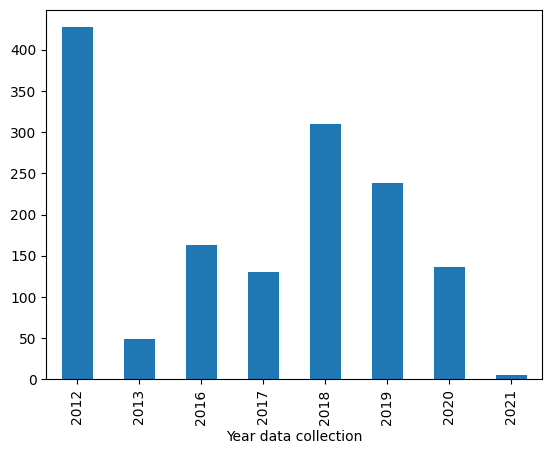

In [14]:
lc['Year data collection'].value_counts().sort_index().plot.bar()

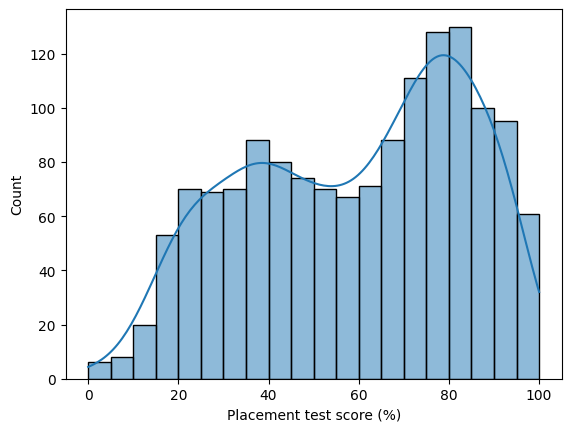

In [15]:
sns.histplot(lc['Placement test score (%)'], kde=True, bins=20)
plt.show()

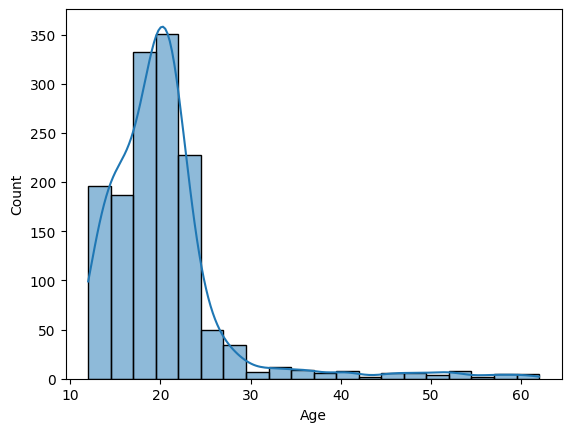

In [16]:
sns.histplot(lc['Age'], kde=True, bins=20)
plt.show()

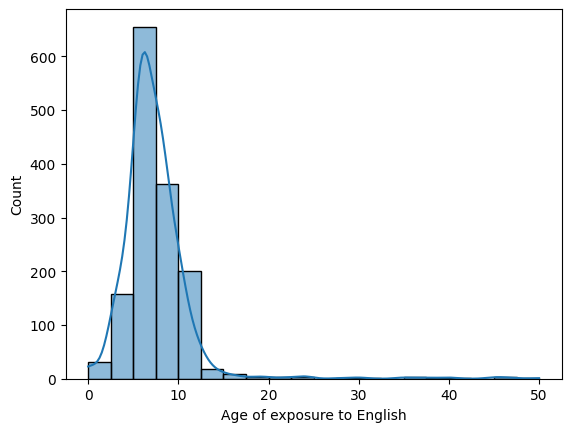

In [17]:
sns.histplot(lc['Age of exposure to English'], kde=True, bins=20)
plt.show()

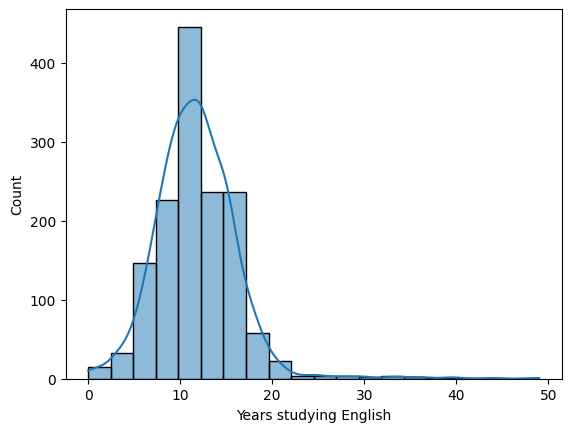

In [18]:
sns.histplot(lc['Years studying English'], kde=True, bins=20)
plt.show()

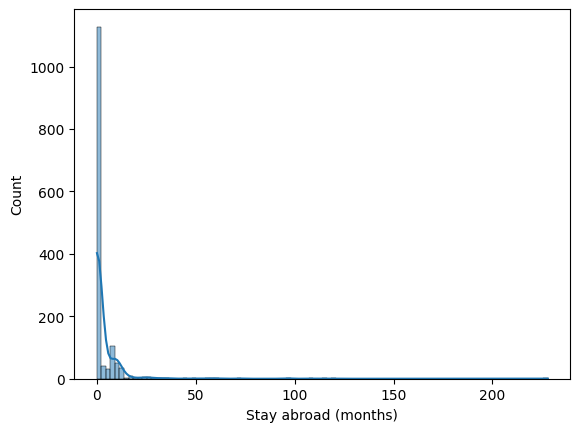

In [19]:
sns.histplot(lc['Stay abroad (months)'] , kde=True, bins=100)
plt.show()

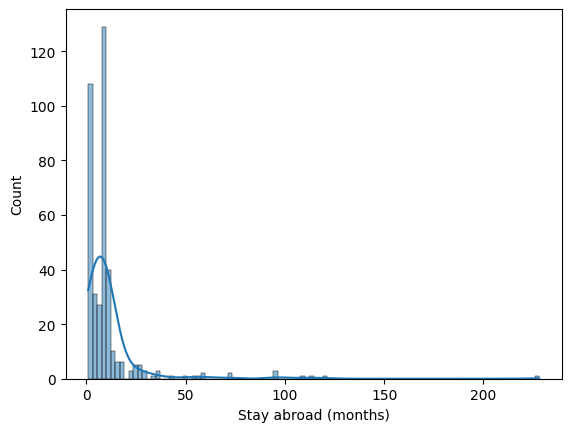

In [20]:
sns.histplot(lc[lc['Stay abroad (months)'] != 0]['Stay abroad (months)'] , kde=True, bins=100)
plt.show()

In [21]:
lc['Stay abroad (months)'].value_counts().sort_index()

Stay abroad (months)
0.00      1043
1.00        47
1.25         1
1.30         1
1.50         6
2.00        30
2.50         1
3.00        22
3.50         1
4.00        16
5.00        14
6.00        16
7.00        11
8.00        11
8.50         1
9.00        83
9.50         1
10.00       33
11.00       15
12.00       25
13.00        9
14.00        1
15.00        2
16.00        4
17.00        1
18.00        3
19.00        2
22.00        1
23.00        2
24.00        2
25.00        3
26.00        3
27.00        1
28.00        1
30.00        3
34.00        1
36.00        3
44.00        1
49.00        1
55.00        1
57.00        1
60.00        2
72.00        2
96.00        3
108.00       1
114.00       1
120.00       1
228.00       1
Name: count, dtype: int64

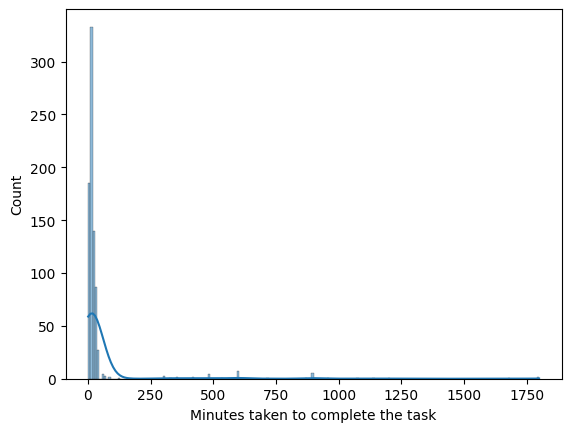

In [22]:
sns.histplot(lc['Minutes taken to complete the task'] , kde=True, bins=200)
plt.show()


<Axes: xlabel='Minutes taken to complete the task'>

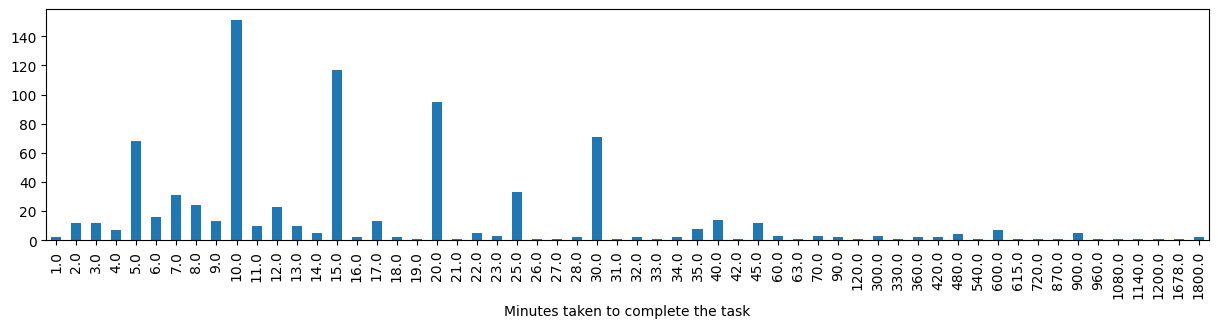

In [23]:
lc['Minutes taken to complete the task'].value_counts().sort_index().plot.bar(figsize=(15, 3))

### Categorical feature distributions

Add some text about the observations

<Axes: xlabel='Sex'>

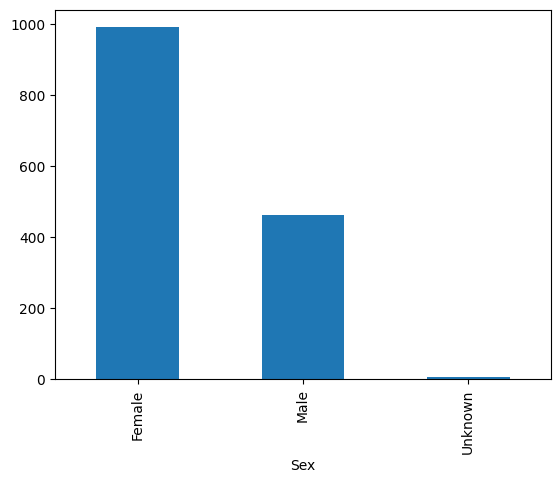

In [24]:
lc['Sex'].value_counts().plot.bar()

<Axes: xlabel='Task number'>

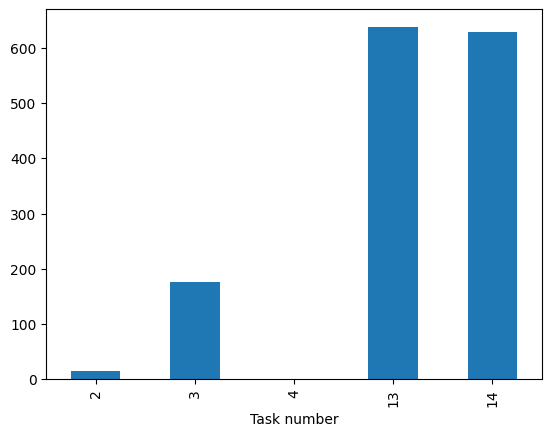

In [25]:
lc['Task number'].value_counts().sort_index().plot.bar()

## Feature Engineering

### Feature selection

In [26]:
lc = lc.drop(columns=['Subcorpus', 
                      'Placement test score (raw)',
                      'Filename', 
                      'School/University/Institution',
                      'Year at university/school',
                      'Major', 
                      'Stay abroad (where)',
                      'Resources used',
                      'Original text',
                      'Medium',
                      'Task title'
                      ])

### Proficiency columns

In [27]:
language_level_columns = ["Proficiency (self-assessment) in additional language writing",
                          "Proficiency (self-assessment) in additional language reading",
                          "Proficiency (self-assessment) in additional language listening",
                          "Proficiency (self-assessment) in additional language speaking",
                          "Proficiency (self-assessment) writing",
                          "Proficiency (self-assessment) reading",
                          "Proficiency (self-assessment) listening",
                          "Proficiency (self-assessment) speaking",
                          "Proficiency"]

mapping = {'C2': 6, 'C1': 5, 'B2': 4, 'B1': 3, 'A2': 2, 'A1': 1}

for column in language_level_columns:
    lc[column] = lc[column].str[:2]
    lc[column] = lc[column].map(mapping)

lc[language_level_columns]

Proficiency (self-assessment) in additional language writing  \
1                                                   1.0              
3                                                   1.0              
5                                                   4.0              
7                                                   2.0              
9                                                   3.0              
...                                                 ...              
1803                                                2.0              
1804                                                2.0              
1806                                                4.0              
1808                                                4.0              
1809                                                3.0              

      Proficiency (self-assessment) in additional language reading  \
1                                                   1.0              
3                                                   1.0              
5                                                   4.0              
7                                                   2.0              
9                                                   3.0              
...                                                 ...              
1803                                                2.0              
1804                                                2.0              
1806                                                4.0              
1808                                                4.0              
1809                                                4.0              

      Proficiency (self-assessment) in additional language listening  \
1                                                   1.0                
3                                                   1.0                
5                                                   4.0                
7                                                   2.0                
9                                                   3.0                
...                                                 ...                
1803                                                2.0                
1804                                                2.0                
1806                                                4.0                
1808                                                3.0                
1809                                                4.0                

      Proficiency (self-assessment) in additional language speaking  \
1                                                   1.0               
3                                                   1.0               
5                                                   4.0               
7                                                   2.0               
9                                                   3.0               
...                                                 ...               
1803                                                2.0               
1804                                                2.0               
1806                                                5.0               
1808                                                4.0               
1809                                                4.0               

      Proficiency (self-assessment) writing  \
1                                       3.0   
3                                       2.0   
5                                       4.0   
7                                       4.0   
9                                       3.0   
...                                     ...   
1803                                    6.0   
1804                                    5.0   
1806                                    5.0   
1808                                    6.0   
1809                                    6.0   

      Proficiency (self-assessment) readi

In [28]:
lc['Proficiency (self-assessment)'] = lc['Proficiency (self-assessment)'].str.split(' / ').str[0].astype(float)
lc['Proficiency (self-assessment)']

1       3.00
3       2.00
5       4.00
7       4.00
9       3.75
        ... 
1803    6.00
1804    5.00
1806    5.00
1808    6.00
1809    6.00
Name: Proficiency (self-assessment), Length: 1459, dtype: float64

### Language certificates (type and level)

In [29]:
# map text to highest certificate level, if not present in text map to uknown
# map highest certficiate level to integers 1 to 6, uknown to 0

import numpy as np
def assign_certificate_level(cell):
    if pd.isna(cell):
        return np.nan
    levels = ['C2', 'C1', 'B2', 'B1', 'A2', 'A1']
    for level in levels:
        if level in cell:
            return level
    return 'unknown'

lc['Language certificates (type and level)'] = lc['Language certificates (type and level)'].apply(assign_certificate_level)

mapping = {'C2': 6, 'C1': 5, 'B2': 4, 'B1': 3, 'A2': 2, 'A1': 1, 'unknown' : 0}

lc['Language certificates (highest level)'] = lc['Language certificates (type and level)'].map(mapping)
lc = lc.drop(columns=['Language certificates (type and level)'])

lc['Language certificates (highest level)'].value_counts()


Language certificates (highest level)
4.0    170
0.0    103
3.0    102
5.0    101
6.0     16
2.0      9
1.0      2
Name: count, dtype: int64

### Languages

#### Father's native language

In [30]:
lc['FatherL1=L1'] = lc['Father\'s native language'] == lc['L1']
lc['FatherL1=L1'].value_counts()

FatherL1=L1
True     1397
False      62
Name: count, dtype: int64

#### Mother's native language

In [31]:
lc['MotherL1=L1'] = lc['Mother\'s native language'] == lc['L1']
lc['MotherL1=L1'].value_counts()

MotherL1=L1
True     1397
False      62
Name: count, dtype: int64

#### Parents L1 different

In [32]:
lc['Parents L1 different'] = lc['Mother\'s native language'] == lc['Father\'s native language']
lc['Parents L1 different'].value_counts()

Parents L1 different
True     1390
False      69
Name: count, dtype: int64

#### Languages spoken at home

##### is L1 spoken at home

In [33]:
def check_language(language_list, language_to_check):
    languages = language_list.split(', ')
    return language_to_check in languages

lc['is L1 spoken at home'] = lc.apply(lambda row: check_language(row['Languages spoken at home'], row['L1']), axis=1)

print(lc['is L1 spoken at home'].value_counts())

is L1 spoken at home
True     1446
False      13
Name: count, dtype: int64


##### is Father L1 spoken at home

In [34]:
def check_language(language_list, language_to_check):
    languages = language_list.split(', ')
    return language_to_check in languages

lc['is Father L1 spoken at home'] = lc.apply(lambda row: check_language(row['Languages spoken at home'], row['Father\'s native language']), axis=1)

print(lc['is Father L1 spoken at home'].value_counts())

is Father L1 spoken at home
True     1407
False      52
Name: count, dtype: int64


##### is Mother L1 spoken at home

In [35]:
def check_language(language_list, language_to_check):
    languages = language_list.split(', ')
    return language_to_check in languages

lc['is Mother L1 spoken at home'] = lc.apply(lambda row: check_language(row['Languages spoken at home'], row['Mother\'s native language']), axis=1)

print(lc['is Mother L1 spoken at home'].value_counts())

is Mother L1 spoken at home
True     1408
False      51
Name: count, dtype: int64


##### Number of languages spoken at home

In [36]:
def count_foreign_languages(row):
    if pd.notna(row['Languages spoken at home']):
        foreign_languages = set(row["Languages spoken at home"].split(", "))
        #foreign_languages.discard(row["L1"])
        return len(foreign_languages)
    else:
        return 0

lc["Number of languages spoken at home"] = lc.apply(count_foreign_languages, axis=1)
lc["Number of languages spoken at home"].value_counts()

Number of languages spoken at home
1    1417
2      36
3       6
Name: count, dtype: int64

In [37]:
from collections import Counter

def get_foreign_languages(row):
    if pd.notna(row["Languages spoken at home"]):
        foreign_languages = row["Languages spoken at home"].split(", ")
        # Remove the first language if it's in the list
        return [lang for lang in foreign_languages if lang != row["L1"]]
    else:
        return []
    
all_foreign_languages = lc.apply(get_foreign_languages, axis=1).sum()

language_counts = Counter(all_foreign_languages)

total_languages = len(language_counts)

total_languages, language_counts

sorted_language_counts = dict(sorted(language_counts.items(), key=lambda item: item[1], reverse=True))
sorted_language_counts

{'English': 24,
 'Italian': 5,
 'French': 5,
 'Arabic': 4,
 'Russian': 3,
 'Catalan': 3,
 'Kurdish': 2,
 'German': 2,
 'Tagalog': 1,
 'Visaya': 1,
 'Low German': 1,
 'Ghana': 1,
 'Turkish': 1,
 'Farsi': 1,
 'Armenian': 1,
 'Spanish': 1,
 'Catalan (Mayorca)': 1,
 'Catalan (Valencia)': 1,
 'Spanish Sign Language': 1,
 'Arabic (Morocco)': 1,
 'Basque': 1}

##### English spoken at home

In [38]:
def english_spoken_at_home(row):
    home_languages = row["Languages spoken at home"].split(", ")
    # Remove the first language if it's in the list
    if 'English' in home_languages:
        return True
    return False

lc['is English spoken at home'] = lc.apply(english_spoken_at_home, axis=1)
lc['is English spoken at home'].value_counts()

is English spoken at home
False    1435
True       24
Name: count, dtype: int64

#### Additional foreign language(s)

##### Number of foreign additional languages

In [39]:
def count_foreign_languages(row):
    if pd.notna(row["Additional foreign language(s)"]):
        foreign_languages = set(row["Additional foreign language(s)"].split(", "))
        foreign_languages.discard(row["L1"])
        return len(foreign_languages)
    else:
        return 0

lc["Number of additional foreign languages"] = lc.apply(count_foreign_languages, axis=1)
lc["Number of additional foreign languages"].value_counts()

Number of additional foreign languages
1    880
0    412
2    126
3     35
4      6
Name: count, dtype: int64

In [40]:
from collections import Counter

def get_foreign_languages(row):
    if pd.notna(row["Additional foreign language(s)"]):
        foreign_languages = row["Additional foreign language(s)"].split(", ")
        # Remove the first language if it's in the list
        return [lang for lang in foreign_languages if lang != row["L1"]]
    else:
        return []
    
all_foreign_languages = lc.apply(get_foreign_languages, axis=1).sum()

language_counts = Counter(all_foreign_languages)

total_languages = len(language_counts)

total_languages, language_counts

sorted_language_counts = dict(sorted(language_counts.items(), key=lambda item: item[1], reverse=True))
sorted_language_counts

{'French': 746,
 'German': 106,
 'Spanish': 103,
 'Italian': 82,
 'Latin': 36,
 'Chinese': 33,
 'Portuguese': 21,
 'Japanese': 21,
 'Russian': 18,
 'Greek': 17,
 'Arabic': 12,
 'Turkish': 8,
 'Korean': 7,
 'Catalan': 6,
 'Ancient Greek': 5,
 'Swedish': 4,
 'Croatian': 3,
 'Polish': 3,
 'Dutch': 3,
 'Basque': 3,
 'Norwegian': 2,
 'Hebrew': 2,
 'Mandarin Chinese': 2,
 'Thai': 1,
 'Saterland Frisian': 1,
 'Bengali': 1,
 'Afrikaans': 1,
 'Tamil': 1,
 'Armenian': 1,
 'Hungarian': 1,
 'Scottish': 1,
 'Bulgarian': 1,
 'Sign Language': 1,
 'Spanish Sign Language': 1,
 'Galician': 1,
 'Catalan (Valencia)': 1,
 'Icelandic': 1,
 'Finnish': 1,
 'Danish': 1,
 'Serbian': 1,
 'German (Switzerland)': 1}

##### One-hot-encode top 12 additional foreign languages

In [41]:
top_12_languages = [lang for lang, _ in language_counts.most_common(12)]

def one_hot_encode_top_languages(row):
    languages_in_row = get_foreign_languages(row)
    for language in top_12_languages:
        row[language] = 1 if language in languages_in_row else 0
    return row

lc_encoded_top = lc.apply(one_hot_encode_top_languages, axis=1)
lc_encoded_top[top_12_languages].head(3)

French  German  Spanish  Italian  Latin  Chinese  Portuguese  Japanese  \
1       0       0        1        0      0        0           0         0   
3       1       0        0        0      0        0           0         0   
5       1       0        1        0      0        0           0         0   

   Russian  Greek  Arabic  Turkish  
1        0      0       0        0  
3        1      0       0        0  
5        0      0       0        0

In [42]:
lc = pd.concat([lc, lc_encoded_top[top_12_languages]], axis=1)
lc.head(3)

Year data collection  Placement test score (%)  Proficiency     Sex   Age  \
1                  2016                      50.0            3    Male  26.0   
3                  2016                      61.7            3  Female  19.0   
5                  2016                      61.7            3  Female  21.0   

       L1 Father's native language Mother's native language  \
1  German                     Urdu                     Urdu   
3  German                  Russian                  Russian   
5  German                   German                   German   

  Languages spoken at home  Age of exposure to English  ...  Spanish Italian  \
1                   German                         8.0  ...        1       0   
3                   German                        10.0  ...        0       0   
5                   German                         9.0  ...        1       0   

  Latin  Chinese  Portuguese  Japanese  Russian  Greek  Arabic Turkish  
1     0        0           0         0        0      0       0       0  
3     0        0           0         0        1      0       0       0  
5     0        0           0         0        0      0       0       0  

[3 rows x 51 columns]

##### Number of additional foreign language(s) not M/F's L1 and home L

In [43]:
def count_foreign_languages(row):
    if pd.notna(row["Additional foreign language(s)"]):
        foreign_languages = set(row["Additional foreign language(s)"].split(", "))
        foreign_languages.discard(row["L1"])
        foreign_languages.discard(row["Father's native language"])
        foreign_languages.discard(row["Mother's native language"])

        if pd.notna(row["Languages spoken at home"]):
            home_languages = set(row["Languages spoken at home"].split(", "))
            foreign_languages = foreign_languages - home_languages

        return len(foreign_languages)
    else:
        return 0

lc["Number of additional foreign language(s) not M/F's L1 and home L"] = lc.apply(count_foreign_languages, axis=1)
lc["Number of additional foreign language(s) not M/F's L1 and home L"].value_counts()

Number of additional foreign language(s) not M/F's L1 and home L
1    860
0    442
2    122
3     31
4      4
Name: count, dtype: int64

In [44]:
lc["Number of additional foreign languages"].value_counts()

Number of additional foreign languages
1    880
0    412
2    126
3     35
4      6
Name: count, dtype: int64

In [45]:
lc.columns

Index(['Year data collection', 'Placement test score (%)', 'Proficiency',
       'Sex', 'Age', 'L1', 'Father's native language',
       'Mother's native language', 'Languages spoken at home',
       'Age of exposure to English', 'Years studying English',
       'Stay abroad in English speaking country (>= 1 month)',
       'Stay abroad (when)', 'Stay abroad (months)',
       'Proficiency (self-assessment) speaking',
       'Proficiency (self-assessment) listening',
       'Proficiency (self-assessment) reading',
       'Proficiency (self-assessment) writing',
       'Proficiency (self-assessment)', 'Additional foreign language(s)',
       'Proficiency (self-assessment) in additional language speaking',
       'Proficiency (self-assessment) in additional language listening',
       'Proficiency (self-assessment) in additional language reading',
       'Proficiency (self-assessment) in additional language writing',
       'Task number', 'Writing/audio details',
       'Minutes taken to c

#### Drop used columns


In [46]:
lc.drop(columns = ['Father\'s native language', 'Mother\'s native language', 'Languages spoken at home'], inplace = True)

### Stay abroad

In [47]:
lc['Stay abroad (when)'].value_counts()

Stay abroad (when)
2017                                                                                        28
2016, 2017                                                                                  27
2017-2018                                                                                   27
2018-2019                                                                                   21
2012                                                                                        18
                                                                                            ..
1992, 1994, 1996, 1998, 1999, 2003, 2010, 2014, 2016, 2017; at most one month every time     1
2005, 2006, 2007, 2008, 2010, 2011                                                           1
USA=2018, 2019, 2020. England= 2019, 2012, 2017.  Ireland: 2016, 2008.  Scotland: 2015.      1
2013, 2014, 2015, 2016                                                                       1
2013, 2014, 2016-2017          

##### Merge Stay abroad when and Year data collection to a column of their difference

In [48]:
import re

def extract_largest_year_safe(text):
    if not isinstance(text, str):
        return np.nan
    
    years = re.findall(r'\d{4}', text)
    if years:
        return max(years, key=int)
    else:
        return np.nan

lc["Stay abroad (when - latest year)"] = lc["Stay abroad (when)"].apply(extract_largest_year_safe)


In [49]:
def subtract_years(row):
    if pd.isna(row["Stay abroad (when - latest year)"]) or pd.isna(row["Year data collection"]):
        return np.nan
    return row["Year data collection"] - int(row["Stay abroad (when - latest year)"])

lc["Year Difference"] = lc.apply(subtract_years, axis=1)
lc['Year Difference'] = lc['Year Difference'].fillna(500).astype('Int64')
lc['Year Difference'] = lc['Year Difference'].replace(500, pd.NA)
lc['Year Difference'].isna().sum()


1071

In [50]:
lc["Year Difference"].value_counts().sort_values(ascending=False)

Year Difference
1     98
0     97
2     60
3     32
4     26
5     21
6     12
8      6
11     6
7      4
10     4
17     3
9      3
27     2
20     2
19     2
24     1
21     1
16     1
12     1
18     1
29     1
34     1
15     1
13     1
22     1
Name: count, dtype: Int64

In [51]:
lc["Year Difference"].isna().sum()

1071

In [52]:
lc.columns

Index(['Year data collection', 'Placement test score (%)', 'Proficiency',
       'Sex', 'Age', 'L1', 'Age of exposure to English',
       'Years studying English',
       'Stay abroad in English speaking country (>= 1 month)',
       'Stay abroad (when)', 'Stay abroad (months)',
       'Proficiency (self-assessment) speaking',
       'Proficiency (self-assessment) listening',
       'Proficiency (self-assessment) reading',
       'Proficiency (self-assessment) writing',
       'Proficiency (self-assessment)', 'Additional foreign language(s)',
       'Proficiency (self-assessment) in additional language speaking',
       'Proficiency (self-assessment) in additional language listening',
       'Proficiency (self-assessment) in additional language reading',
       'Proficiency (self-assessment) in additional language writing',
       'Task number', 'Writing/audio details',
       'Minutes taken to complete the task', 'Where the task was done', 'Text',
       'Language certificates (highes

In [53]:
lc = lc.drop(columns=['Stay abroad (when)', 'Stay abroad (when - latest year)'])


### Make columns with 2 distinct values binary

#### Sex

In [54]:
lc['Sex'].value_counts()

Sex
Female     990
Male       461
Unknown      8
Name: count, dtype: int64

In [55]:
lc['Sex'].replace('Unknown', np.nan, inplace=True)


In [56]:
lc['Sex'].value_counts()

Sex
Female    990
Male      461
Name: count, dtype: int64

In [57]:
lc['Sex: Female'] = lc['Sex'].map({'Male': 0, 'Female': 1})

In [58]:
lc['Sex: Female'].value_counts()

Sex: Female
1.0    990
0.0    461
Name: count, dtype: int64

In [59]:
lc = lc.drop(columns=['Sex'])

#### L1

In [60]:
lc['L1: German'] = lc['L1'].map({'Spanish': 0, 'German': 1})

In [61]:
lc = lc.drop(columns=['L1'])

#### Writing/audio details	

In [62]:
lc['Writing/audio details'].value_counts()

Writing/audio details
written_online               910
written_offline_classroom    549
Name: count, dtype: int64

In [63]:
lc['Online'] = lc['Writing/audio details'].map({'written_online': 1, 'written_offline_classroom': 0})

In [64]:
lc = lc.drop(columns=['Writing/audio details'])

#### Stay abroad in English speaking country (>= 1 month)

In [65]:
lc['Stay abroad in English speaking country (>= 1 month)'] = lc['Stay abroad in English speaking country (>= 1 month)'].map({'No': 0, 'Yes': 1})

### Remove duplicated rows

In [66]:
lc.duplicated().sum()

3

In [67]:
lc = lc.drop_duplicates()

### NaN analysis

#### NaN count

Lets handle the NaNs in the coolumns with the most of them separately

In [68]:
lc.isna().sum().sort_values(ascending=False)

Year Difference                                                     1068
Language certificates (highest level)                                956
Proficiency (self-assessment) in additional language listening       835
Proficiency (self-assessment) in additional language writing         835
Proficiency (self-assessment) in additional language reading         834
Proficiency (self-assessment) in additional language speaking        832
Minutes taken to complete the task                                   642
Where the task was done                                              549
Additional foreign language(s)                                       411
Stay abroad (months)                                                  24
Years studying English                                                18
Proficiency (self-assessment) writing                                  9
Sex: Female                                                            8
Proficiency (self-assessment) reading              

#### Row Nans

In [69]:
# row nans
nan_counts_per_row = lc.isna().sum(axis=1)
nan_counts_value_counts = nan_counts_per_row.value_counts().sort_index(ascending=False)
nan_counts_value_counts

12      4
11      3
10      7
9     123
8     403
7     102
6     124
5      67
4       1
3      98
2     127
1     212
0     185
Name: count, dtype: int64

#### NaN ratios per L1

In [70]:
columns_with_nans = lc.columns[lc.isna().any()].tolist()
columns_with_nans.append("L1: German")
lc_nans = lc[columns_with_nans]
spanish_df = lc_nans[lc_nans['L1: German'] == '0']
german_df = lc_nans[lc_nans['L1: German'] == '1']
spanish_nans = spanish_df.isna().sum()
german_nans = german_df.isna().sum()
percentage_spanish_nans = spanish_nans / len(spanish_df)
percentage_spanish_nans

Age                                                              NaN
Age of exposure to English                                       NaN
Years studying English                                           NaN
Stay abroad (months)                                             NaN
Proficiency (self-assessment) speaking                           NaN
Proficiency (self-assessment) listening                          NaN
Proficiency (self-assessment) reading                            NaN
Proficiency (self-assessment) writing                            NaN
Additional foreign language(s)                                   NaN
Proficiency (self-assessment) in additional language speaking    NaN
Proficiency (self-assessment) in additional language listening   NaN
Proficiency (self-assessment) in additional language reading     NaN
Proficiency (self-assessment) in additional language writing     NaN
Minutes taken to complete the task                               NaN
Where the task was done           

In [71]:
percentage_german_nans = german_nans / len(german_df)
percentage_german_nans

Age                                                              NaN
Age of exposure to English                                       NaN
Years studying English                                           NaN
Stay abroad (months)                                             NaN
Proficiency (self-assessment) speaking                           NaN
Proficiency (self-assessment) listening                          NaN
Proficiency (self-assessment) reading                            NaN
Proficiency (self-assessment) writing                            NaN
Additional foreign language(s)                                   NaN
Proficiency (self-assessment) in additional language speaking    NaN
Proficiency (self-assessment) in additional language listening   NaN
Proficiency (self-assessment) in additional language reading     NaN
Proficiency (self-assessment) in additional language writing     NaN
Minutes taken to complete the task                               NaN
Where the task was done           

### Final participant attribute selection

In [72]:
lc_selected = lc.drop(columns=['Year Difference', 
                               'Minutes taken to complete the task',
                                'Where the task was done', 
                                'Additional foreign language(s)'
                                ]).copy(deep=True)

### NaN handling

#### KNN imputation

In [73]:
from sklearn.impute import KNNImputer

columns_with_missing_values = ['Language certificates (highest level)',
                               'Proficiency (self-assessment) in additional language listening',
                               'Proficiency (self-assessment) in additional language writing',
                               'Proficiency (self-assessment) in additional language reading',
                               'Proficiency (self-assessment) in additional language speaking',
                               'Proficiency (self-assessment) listening',
                               'Proficiency (self-assessment) writing',
                               'Proficiency (self-assessment) reading',
                               'Proficiency (self-assessment) speaking',
                               'Stay abroad (months)',
                               'Years studying English', 
                               'Age', 
                               'Age of exposure to English',
                               'Sex: Female'
                               ]

knn_imputer = KNNImputer(n_neighbors=5)
lc_selected[columns_with_missing_values] = knn_imputer.fit_transform(lc_selected[columns_with_missing_values])

In [74]:
lc_selected.isna().sum()

Year data collection                                                0
Placement test score (%)                                            0
Proficiency                                                         0
Age                                                                 0
Age of exposure to English                                          0
Years studying English                                              0
Stay abroad in English speaking country (>= 1 month)                0
Stay abroad (months)                                                0
Proficiency (self-assessment) speaking                              0
Proficiency (self-assessment) listening                             0
Proficiency (self-assessment) reading                               0
Proficiency (self-assessment) writing                               0
Proficiency (self-assessment)                                       0
Proficiency (self-assessment) in additional language speaking       0
Proficiency (self-as

In [75]:
lc_selected.isna().sum().sum()

0

### Categorical columns

In [76]:
lc_selected.dtypes

Year data collection                                                  int64
Placement test score (%)                                            float64
Proficiency                                                           int64
Age                                                                 float64
Age of exposure to English                                          float64
Years studying English                                              float64
Stay abroad in English speaking country (>= 1 month)                  int64
Stay abroad (months)                                                float64
Proficiency (self-assessment) speaking                              float64
Proficiency (self-assessment) listening                             float64
Proficiency (self-assessment) reading                               float64
Proficiency (self-assessment) writing                               float64
Proficiency (self-assessment)                                       float64
Proficiency 

In [77]:
lc_selected.select_dtypes(include='object')

Text
1     One day Tommy found a frog in the Forest. He b...
3     One day, there was a boy called John who wante...
5     One day a young boy and his dog stayed up late...
7     One night, a little boy and his dog watch over...
9     Charlie Chaplin is walking down a street with ...
...                                                 ...
1803  The tramp is walking around an area of abandon...
1804  He is probably one of the most relevant presid...
1806  Charles Chaplin is walking down a narrow and d...
1808  From afar comes a man, actually, he is Charles...
1809  At first, we see Chaplin walking through the c...

[1456 rows x 1 columns]

## Text feature engineering

### Tokenize sentences and lemmatize words

In [78]:
lc['Text'] = lc ['Text'].str.lower()

In [79]:
#### First let us define function that returns tokenized sentences and lemmatized words from the corresponding sentences
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')

#Defining function to: 1) tokenize sentences, 2) lemmatize words in sentences
def tokenize_and_lemmatize(text):
    # Tokenize sentences
    sentences = sent_tokenize(text)
    
    # Tokenize words and lemmatize
    lemmatizer = WordNetLemmatizer()
    tokenized_sentences = []
    lemmatized_words = []
    for sentence in sentences:
        words = word_tokenize(sentence)
        lemmatized_words.extend([lemmatizer.lemmatize(word) for word in words])
        tokenized_sentences.append(words)
    
    return tokenized_sentences, lemmatized_words
print("done")

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


done


[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...


In [80]:
# dataset_imputed[['Tokenized Sentences', 'Lemmatized Words']] = dataset_imputed['Text'].apply(lambda x: tokenize_and_lemmatize(x))
nltk.download('omw-1.4')

tokenized_and_lemmatized = lc_selected['Text'].apply(lambda x: tokenize_and_lemmatize(x))
lc_selected[['Tokenized Sentences', 'Lemmatized Words']] = tokenized_and_lemmatized.apply(pd.Series)
print("done")

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/codespace/nltk_data...


done


In [81]:
lc_selected.head(2)

Year data collection  Placement test score (%)  Proficiency   Age  \
1                  2016                      50.0            3  26.0   
3                  2016                      61.7            3  19.0   

   Age of exposure to English  Years studying English  \
1                         8.0                    13.0   
3                        10.0                    11.0   

   Stay abroad in English speaking country (>= 1 month)  Stay abroad (months)  \
1                                                  0                      0.0   
3                                                  0                      0.0   

   Proficiency (self-assessment) speaking  \
1                                     3.0   
3                                     2.0   

   Proficiency (self-assessment) listening  ...  Russian  Greek  Arabic  \
1                                      3.0  ...        0      0       0   
3                                      2.0  ...        1      0       0   

   Turkish  Number of additional foreign language(s) not M/F's L1 and home L  \
1        0                                                  1                  
3        0                                                  2                  

   Sex: Female  L1: German  Online  \
1          0.0           1       1   
3          1.0           1       1   

                                 Tokenized Sentences  \
1  [[One, day, Tommy, found, a, frog, in, the, Fo...   
3  [[One, day, ,, there, was, a, boy, called, Joh...   

                                    Lemmatized Words  
1  [One, day, Tommy, found, a, frog, in, the, For...  
3  [One, day, ,, there, wa, a, boy, called, John,...  

[2 rows x 47 columns]

In [82]:
import nltk
nltk.download('punkt')

lc_selected['tokenized_text'] = lc_selected['Text'].apply(nltk.word_tokenize)

print(lc_selected['tokenized_text'].head())


lc.columns

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


1    [One, day, Tommy, found, a, frog, in, the, For...
3    [One, day, ,, there, was, a, boy, called, John...
5    [One, day, a, young, boy, and, his, dog, staye...
7    [One, night, ,, a, little, boy, and, his, dog,...
9    [Charlie, Chaplin, is, walking, down, a, stree...
Name: tokenized_text, dtype: object


Index(['Year data collection', 'Placement test score (%)', 'Proficiency',
       'Age', 'Age of exposure to English', 'Years studying English',
       'Stay abroad in English speaking country (>= 1 month)',
       'Stay abroad (months)', 'Proficiency (self-assessment) speaking',
       'Proficiency (self-assessment) listening',
       'Proficiency (self-assessment) reading',
       'Proficiency (self-assessment) writing',
       'Proficiency (self-assessment)', 'Additional foreign language(s)',
       'Proficiency (self-assessment) in additional language speaking',
       'Proficiency (self-assessment) in additional language listening',
       'Proficiency (self-assessment) in additional language reading',
       'Proficiency (self-assessment) in additional language writing',
       'Task number', 'Minutes taken to complete the task',
       'Where the task was done', 'Text',
       'Language certificates (highest level)', 'FatherL1=L1', 'MotherL1=L1',
       'Parents L1 different', 'i

### Feature Augmentation: extract features from text

In [83]:
# Number of unique words: The count of distinct words in each poem
lc_selected['unique_word_count'] = lc_selected['Lemmatized Words'].apply(lambda x: len(set(x)))

# Lexical diversity (Type-Token Ratio): Ratio of unique words to total words in a poem
lc_selected['lexical_diversity'] = lc_selected['unique_word_count'] / lc_selected['Lemmatized Words'].str.len()

# Sentence count: The number of sentences in each poem.
from nltk.tokenize import sent_tokenize
lc_selected['sentence_count'] = lc_selected['Text'].apply(lambda x: len(sent_tokenize(x)))

# Average words per sentence: Total words divided by the number of sentences.
lc_selected['avg_words_per_sentence'] = lc_selected['tokenized_text'].str.len() / lc_selected['sentence_count']

# Punctuation count: Count of punctuation marks (commas, periods, etc.) in each poem.
import string
lc_selected['punctuation_count'] = lc_selected['Text'].apply(lambda x: sum(1 for c in x if c in string.punctuation))

# Gunning Fog Index: Another readability measure based on sentence and word complexity
!pip install textstat
import textstat
from textstat import gunning_fog
lc_selected['gunning_fog_index'] = lc_selected['Text'].apply(lambda x: gunning_fog(x))

from nltk.probability import FreqDist
nltk.download('averaged_perceptron_tagger')

# POS (Part of Speech) Features:
def pos_distribution(tokens):
    tags = nltk.pos_tag(tokens)
    tag_freq = FreqDist(tag for word, tag in tags)
    return tag_freq

lc_selected['pos_distribution'] = lc_selected['tokenized_text'].apply(pos_distribution)


print("done")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


done


### Word frequencies

#### wf

In [84]:
wf = pd.read_csv('wordFreq.csv')

In [85]:
wf.set_index('rank', inplace=True)

In [86]:
wf = wf[['lemma', 'PoS']]
wf

lemma PoS
rank              
1          the   a
2           be   v
3          and   c
4            a   a
5           of   i
...        ...  ..
5046  keyboard   n
5047   persist   v
5048     wheat   n
5049  predator   n
5050   bizarre   j

[5050 rows x 2 columns]

PoS tags are noted by the first letter of these PoS tags https://ucrel.lancs.ac.uk/claws7tags.html

In [87]:
wf['lemma'].value_counts()

lemma
like          6
no            5
top           4
past          4
before        3
             ..
weak          1
nose          1
variable      1
convention    1
bizarre       1
Name: count, Length: 4380, dtype: int64

In [88]:
wf['PoS'].value_counts()

PoS
n    2635
v     969
j     824
r     331
i      94
p      47
c      40
d      34
m      33
u      28
a      11
x       2
t       1
e       1
Name: count, dtype: int64

a - article <br>
c - conjunction<br>
d - determiner<br>
e - existential there<br>
i - preposition<br>
j - adjective<br>
m - number<br>
n - noun<br>
p - pronoun<br>
r - adverb<br>
t - infinitive marker (to) <br>
u - interjection (e.g. oh, yes, um) <br>
v - verb <br>
x - not, n't

#### get freqs

##### get pos tags in dict

In [89]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


# Function to get wordnet POS tag
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# Function to process text into the required dictionary format
def process_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    
    allowed_tags = set('acdeijmnprtuvx')
    lem_pos_dict = {}
    for word, tag in pos_tags:
        wntag = get_wordnet_pos(tag)
        lemma = lemmatizer.lemmatize(word, pos=wntag) if wntag else lemmatizer.lemmatize(word)
        simplified_tag = tag[0].lower() if tag[0].lower() in allowed_tags else '0'
        lem_pos_dict[lemma] = simplified_tag
    
    return lem_pos_dict

# Apply the function to the DataFrame
lc['lemmatized_pos'] = lc['Text'].apply(process_text)

# Display the result
lc['lemmatized_pos']


1       {'one': 'c', 'day': 'n', 'tommy': 'n', 'find':...
3       {'one': 'c', 'day': 'n', ',': '0', 'there': 'e...
5       {'one': 'c', 'day': 'n', 'a': 'd', 'young': 'j...
7       {'one': 'c', 'night': 'n', ',': '0', 'a': 'd',...
9       {'charlie': 'j', 'chaplin': 'n', 'be': 'v', 'w...
                              ...                        
1803    {'the': 'd', 'tramp': 'n', 'be': 'v', 'walk': ...
1804    {'he': 'p', 'be': 'v', 'probably': 'r', 'one':...
1806    {'charles': 'n', 'chaplin': 'n', 'be': 'v', 'w...
1808    {'from': 'i', 'afar': 'r', 'come': 'v', 'a': '...
1809    {'at': 'i', 'first': 'j', ',': '0', 'we': 'p',...
Name: lemmatized_pos, Length: 1456, dtype: object

In [90]:

def map_lemma_to_freq(wf, lc):
    # Initialize the new column in lc to store frequency ranks
    lc['lemmatized_freqs'] = None

    # Function to find the frequency rank for a given lemma and pos tag
    def find_freq_rank(lemma, pos):
        matches = wf[(wf['lemma'] == lemma) & (wf['PoS'] == pos)]
        return matches.index[0] if not matches.empty else None

    # Iterate over the lc dataframe
    for i, row in lc.iterrows():
        lemmatized_freqs = {}
        for lemma, pos in row['lemmatized_pos'].items():
            freq_rank = find_freq_rank(lemma, pos)
            if freq_rank is not None:
                lemmatized_freqs[lemma] = freq_rank
        lc.at[i, 'lemmatized_freqs'] = lemmatized_freqs

# Apply the function
map_lemma_to_freq(wf, lc)

lc['lemmatized_freqs']

1       {'day': 96, 'find': 97, 'in': 7, 'he': 16, 'br...
3       {'day': 96, 'there': 55, 'be': 2, 'boy': 358, ...
5       {'day': 96, 'young': 288, 'boy': 358, 'and': 3...
7       {'night': 208, 'little': 238, 'boy': 358, 'and...
9       {'be': 2, 'walk': 384, 'down': 119, 'street': ...
                              ...                        
1803    {'be': 2, 'walk': 384, 'around': 307, 'area': ...
1804    {'he': 16, 'be': 2, 'probably': 366, 'of': 5, ...
1806    {'be': 2, 'walk': 384, 'down': 119, 'narrow': ...
1808    {'from': 30, 'come': 61, 'man': 95, 'actually'...
1809    {'at': 27, 'we': 21, 'see': 56, 'walk': 384, '...
Name: lemmatized_freqs, Length: 1456, dtype: object

##### lemmatized_freqs_avg, lemmatized_freqs_None_ratio

In [91]:
def map_lemma_to_freq(wf, lc):
    # Check if 'lemmatized_pos' column exists in lc
    if 'lemmatized_pos' not in lc.columns:
        print("Column 'lemmatized_pos' not found in lc dataframe")
        return

    # Initialize new columns in lc
    lc['lemmatized_freqs'] = None
    lc['lemmatized_freqs_avg'] = None
    lc['lemmatized_freqs_None_ratio'] = None

    # Function to find the frequency rank for a given lemma and pos tag
    def find_freq_rank(lemma, pos):
        matches = wf[(wf['lemma'] == lemma) & (wf['PoS'] == pos)]
        return matches.index[0] if not matches.empty else None

    # Iterate over the lc dataframe
    for i, row in lc.iterrows():
        lemmatized_freqs = {}
        total_freq = 0
        none_count = 0
        word_count = 0

        for lemma, pos in row['lemmatized_pos'].items():
            word_count += 1
            freq_rank = find_freq_rank(lemma, pos)
            if freq_rank is not None:
                lemmatized_freqs[lemma] = freq_rank
                total_freq += freq_rank
            else:
                none_count += 1

        lc.at[i, 'lemmatized_freqs'] = lemmatized_freqs
        if word_count > 0:
            lc.at[i, 'lemmatized_freqs_avg'] = total_freq / word_count if total_freq > 0 else None
            lc.at[i, 'lemmatized_freqs_None_ratio'] = none_count / word_count

# Apply the function
map_lemma_to_freq(wf, lc)

# Display the updated lc dataframe
lc[['lemmatized_freqs_avg', 'lemmatized_freqs_None_ratio']]


lemmatized_freqs_avg lemmatized_freqs_None_ratio
1              323.333333                    0.266667
3              338.175676                    0.337838
5              589.010204                    0.234694
7              629.270588                    0.176471
9              623.329193                    0.229814
...                   ...                         ...
1803           449.269231                    0.301282
1804           473.693694                    0.297297
1806           421.652174                    0.246377
1808           659.809091                    0.272727
1809           507.868421                    0.184211

[1456 rows x 2 columns]

In [92]:
lc[['lemmatized_freqs_avg', 'lemmatized_freqs_None_ratio']].mean()

lemmatized_freqs_avg           458.786582
lemmatized_freqs_None_ratio      0.285197
dtype: object

In [93]:
lc.columns

Index(['Year data collection', 'Placement test score (%)', 'Proficiency',
       'Age', 'Age of exposure to English', 'Years studying English',
       'Stay abroad in English speaking country (>= 1 month)',
       'Stay abroad (months)', 'Proficiency (self-assessment) speaking',
       'Proficiency (self-assessment) listening',
       'Proficiency (self-assessment) reading',
       'Proficiency (self-assessment) writing',
       'Proficiency (self-assessment)', 'Additional foreign language(s)',
       'Proficiency (self-assessment) in additional language speaking',
       'Proficiency (self-assessment) in additional language listening',
       'Proficiency (self-assessment) in additional language reading',
       'Proficiency (self-assessment) in additional language writing',
       'Task number', 'Minutes taken to complete the task',
       'Where the task was done', 'Text',
       'Language certificates (highest level)', 'FatherL1=L1', 'MotherL1=L1',
       'Parents L1 different', 'i

##### PoS ratios

In [94]:
def map_lemma_to_freq(wf, lc):
    # Define the list of POS tags to calculate ratios for
    pos_tags = ['n', 'v', 'j', 'r', 'i', 'p', 'c', 'd', 'm', 'u', 'a']

    # Check if 'lemmatized_pos' column exists in lc
    if 'lemmatized_pos' not in lc.columns:
        print("Column 'lemmatized_pos' not found in lc dataframe")
        return

    # Initialize new columns in lc
    lc['lemmatized_freqs'] = None
    lc['lemmatized_freqs_avg'] = None
    lc['lemmatized_freqs_None_ratio'] = None
    for pos in pos_tags:
        lc[f'pos_ratio_{pos}'] = None

    # Function to find the frequency rank for a given lemma and pos tag
    def find_freq_rank(lemma, pos):
        matches = wf[(wf['lemma'] == lemma) & (wf['PoS'] == pos)]
        return matches.index[0] if not matches.empty else None

    # Iterate over the lc dataframe
    for i, row in lc.iterrows():
        lemmatized_freqs = {}
        total_freq = 0
        none_count = 0
        word_count = 0
        pos_counts = {pos: 0 for pos in pos_tags}

        for lemma, pos in row['lemmatized_pos'].items():
            word_count += 1
            pos_counts[pos] = pos_counts.get(pos, 0) + 1
            freq_rank = find_freq_rank(lemma, pos)
            if freq_rank is not None:
                lemmatized_freqs[lemma] = freq_rank
                total_freq += freq_rank
            else:
                none_count += 1

        lc.at[i, 'lemmatized_freqs'] = lemmatized_freqs
        if word_count > 0:
            lc.at[i, 'lemmatized_freqs_avg'] = total_freq / word_count if total_freq > 0 else None
            lc.at[i, 'lemmatized_freqs_None_ratio'] = none_count / word_count
            for pos in pos_tags:
                lc.at[i, f'pos_ratio_{pos}'] = pos_counts[pos] / word_count

# Apply the function
map_lemma_to_freq(wf, lc)

lc[['pos_ratio_n', 'pos_ratio_v', 'pos_ratio_j', 'pos_ratio_r', 'pos_ratio_i', 'pos_ratio_p', 'pos_ratio_c', 'pos_ratio_d', 'pos_ratio_m', 'pos_ratio_u', 'pos_ratio_a']]


pos_ratio_n pos_ratio_v pos_ratio_j pos_ratio_r pos_ratio_i pos_ratio_p  \
1       0.283333    0.283333        0.05    0.033333    0.133333        0.05   
3       0.256757    0.216216    0.067568    0.121622    0.094595    0.067568   
5       0.244898     0.22449    0.071429    0.112245    0.122449    0.071429   
7       0.247059    0.223529    0.082353    0.129412    0.105882    0.070588   
9       0.279503    0.254658    0.062112    0.111801    0.111801    0.043478   
...          ...         ...         ...         ...         ...         ...   
1803    0.314103    0.282051    0.070513    0.089744    0.096154    0.044872   
1804    0.324324    0.189189    0.162162     0.09009    0.081081    0.054054   
1806    0.246377    0.289855    0.043478    0.115942    0.072464    0.057971   
1808    0.322727        0.25    0.095455    0.090909         0.1    0.031818   
1809    0.157895    0.302632    0.052632    0.092105    0.171053    0.092105   

     pos_ratio_c pos_ratio_d pos_ratio_m pos_ratio_u pos_ratio_a  
1           0.05    0.033333         0.0         0.0         0.0  
3       0.040541    0.040541    0.013514         0.0         0.0  
5       0.030612    0.040816         0.0         0.0         0.0  
7       0.035294    0.047059         0.0         0.0         0.0  
9       0.018634    0.049689    0.012422         0.0         0.0  
...          ...         ...         ...         ...         ...  
1803    0.025641    0.032051     0.00641         0.0         0.0  
1804    0.036036    0.018018    0.018018         0.0         0.0  
1806    0.028986    0.072464         0.0         0.0         0.0  
1808    0.022727    0.027273    0.004545         0.0         0.0  
1809    0.026316    0.039474         0.0         0.0         0.0  

[1456 rows x 11 columns]

In [95]:
lc[['pos_ratio_n', 'pos_ratio_v', 'pos_ratio_j', 'pos_ratio_r', 'pos_ratio_i', 'pos_ratio_p', 'pos_ratio_c', 'pos_ratio_d', 'pos_ratio_m', 'pos_ratio_u', 'pos_ratio_a']].describe()

pos_ratio_n  pos_ratio_v  pos_ratio_j  pos_ratio_r  pos_ratio_i  \
count       1456.00      1456.00       1456.0       1456.0  1456.000000   
unique       707.00       655.00        573.0        549.0   504.000000   
top            0.25         0.25          0.0          0.0     0.111111   
freq          40.00        32.00         67.0         54.0    39.000000   

        pos_ratio_p  pos_ratio_c  pos_ratio_d  pos_ratio_m  pos_ratio_u  \
count     1456.0000  1456.000000  1456.000000       1456.0       1456.0   
unique     419.0000   355.000000   360.000000        208.0         12.0   
top          0.0625     0.043478     0.041667          0.0          0.0   
freq        25.0000    22.000000    29.000000        866.0       1444.0   

        pos_ratio_a  
count        1456.0  
unique          1.0  
top             0.0  
freq         1456.0

In [96]:
lc[['pos_ratio_n', 'pos_ratio_v', 'pos_ratio_j', 'pos_ratio_r', 'pos_ratio_i', 'pos_ratio_p', 'pos_ratio_c', 'pos_ratio_d', 'pos_ratio_m', 'pos_ratio_u', 'pos_ratio_a']].mean()

pos_ratio_n    0.279456
pos_ratio_v     0.23798
pos_ratio_j    0.065888
pos_ratio_r    0.080514
pos_ratio_i    0.106743
pos_ratio_p    0.061444
pos_ratio_c    0.035658
pos_ratio_d    0.046046
pos_ratio_m    0.005773
pos_ratio_u    0.000101
pos_ratio_a         0.0
dtype: object

### Select text features

In [97]:
text_features = lc_selected[['unique_word_count', 'lexical_diversity','sentence_count','avg_words_per_sentence', 'punctuation_count', 'gunning_fog_index',]]
text_features.head(2)

unique_word_count  lexical_diversity  sentence_count  \
1                 66           0.481752              10   
3                 82           0.554054              12   

   avg_words_per_sentence  punctuation_count  gunning_fog_index  
1               13.700000                 15               4.88  
3               12.333333                 17               5.28

In [98]:
text_features.describe()

unique_word_count  lexical_diversity  sentence_count  \
count        1456.000000        1456.000000     1456.000000   
mean           91.978709           0.490257       10.041209   
std            39.145919           0.091333        5.559149   
min             9.000000           0.246140        1.000000   
25%            64.000000           0.426265        6.000000   
50%            85.000000           0.472887        9.000000   
75%           115.000000           0.538957       13.000000   
max           305.000000           0.916667       51.000000   

       avg_words_per_sentence  punctuation_count  gunning_fog_index  
count             1456.000000        1456.000000        1456.000000  
mean                22.046420          23.696429           8.571710  
std                 13.208057          14.739708           4.679052  
min                  5.000000           1.000000           2.000000  
25%                 16.000000          14.000000           6.130000  
50%                 19.928571          20.000000           7.940000  
75%                 24.517857          29.000000           9.812500  
max                210.000000         153.000000          78.220000

In [99]:
# Dropping the columns we do not need anymore (including pos tags), so it is usable for the machine learning algorithms

workable_data = lc_selected.drop(columns= ['Text', 'Tokenized Sentences', 'Lemmatized Words', 'tokenized_text', 'pos_distribution'])
workable_data.head(5)

Year data collection  Placement test score (%)  Proficiency   Age  \
1                  2016                      50.0            3  26.0   
3                  2016                      61.7            3  19.0   
5                  2016                      61.7            3  21.0   
7                  2016                      61.7            3  22.0   
9                  2018                      63.3            3  33.0   

   Age of exposure to English  Years studying English  \
1                         8.0                    13.0   
3                        10.0                    11.0   
5                         9.0                    12.0   
7                         7.0                    15.0   
9                        10.0                    10.0   

   Stay abroad in English speaking country (>= 1 month)  Stay abroad (months)  \
1                                                  0                      0.0   
3                                                  0                      0.0   
5                                                  0                      0.0   
7                                                  0                      0.0   
9                                                  0                      0.0   

   Proficiency (self-assessment) speaking  \
1                                     3.0   
3                                     2.0   
5                                     4.0   
7                                     4.0   
9                                     4.0   

   Proficiency (self-assessment) listening  ...  \
1                                      3.0  ...   
3                                      2.0  ...   
5                                      4.0  ...   
7                                      4.0  ...   
9                                      4.0  ...   

   Number of additional foreign language(s) not M/F's L1 and home L  \
1                                                  1                  
3                                                  2                  
5                                                  2                  
7                                                  1                  
9                                                  1                  

   Sex: Female  L1: German  Online  unique_word_count  lexical_diversity  \
1          0.0           1       1                 66           0.481752   
3          1.0           1       1                 82           0.554054   
5          1.0           1       1                103           0.472477   
7          1.0           1       1                 92           0.513966   
9          1.0           1       1                179           0.381663   

   sentence_count  avg_words_per_sentence  punctuation_count  \
1              10               13.700000                 15   
3              12               12.333333                 17   
5              11               19.818182                 23   
7              11               16.272727                 27   
9              17               27.588235                 64   

   gunning_fog_index  
1               4.88  
3               5.28  
5               7.90  
7               6.17  
9              10.62  

[5 rows x 50 columns]

In [100]:
word_freq_features = lc[['lemmatized_freqs_avg', 
                         'lemmatized_freqs_None_ratio', 
                         'pos_ratio_n', 
                         'pos_ratio_v', 
                         'pos_ratio_j', 
                         'pos_ratio_r', 
                         'pos_ratio_i', 
                         'pos_ratio_p', 
                         'pos_ratio_c', 
                         'pos_ratio_d', 
                         'pos_ratio_m', 
                         'pos_ratio_u', 
                         'pos_ratio_a']]

workable_data = pd.concat([workable_data, word_freq_features.reindex(workable_data.index)], axis=1)
workable_data.head(5)

Year data collection  Placement test score (%)  Proficiency   Age  \
1                  2016                      50.0            3  26.0   
3                  2016                      61.7            3  19.0   
5                  2016                      61.7            3  21.0   
7                  2016                      61.7            3  22.0   
9                  2018                      63.3            3  33.0   

   Age of exposure to English  Years studying English  \
1                         8.0                    13.0   
3                        10.0                    11.0   
5                         9.0                    12.0   
7                         7.0                    15.0   
9                        10.0                    10.0   

   Stay abroad in English speaking country (>= 1 month)  Stay abroad (months)  \
1                                                  0                      0.0   
3                                                  0                      0.0   
5                                                  0                      0.0   
7                                                  0                      0.0   
9                                                  0                      0.0   

   Proficiency (self-assessment) speaking  \
1                                     3.0   
3                                     2.0   
5                                     4.0   
7                                     4.0   
9                                     4.0   

   Proficiency (self-assessment) listening  ...  pos_ratio_v  pos_ratio_j  \
1                                      3.0  ...     0.283333         0.05   
3                                      2.0  ...     0.216216     0.067568   
5                                      4.0  ...      0.22449     0.071429   
7                                      4.0  ...     0.223529     0.082353   
9                                      4.0  ...     0.254658     0.062112   

   pos_ratio_r  pos_ratio_i  pos_ratio_p  pos_ratio_c  pos_ratio_d  \
1     0.033333     0.133333         0.05         0.05     0.033333   
3     0.121622     0.094595     0.067568     0.040541     0.040541   
5     0.112245     0.122449     0.071429     0.030612     0.040816   
7     0.129412     0.105882     0.070588     0.035294     0.047059   
9     0.111801     0.111801     0.043478     0.018634     0.049689   

   pos_ratio_m  pos_ratio_u  pos_ratio_a  
1          0.0          0.0          0.0  
3     0.013514          0.0          0.0  
5          0.0          0.0          0.0  
7          0.0          0.0          0.0  
9     0.012422          0.0          0.0  

[5 rows x 63 columns]

## Export data

Export and reimport workable data so that the part before this won't be needed to run again

In [101]:
file_name = 'workable_data.csv'
workable_data.to_csv(file_name, index=False)


In [4]:
workable_data = pd.read_csv('workable_data.csv')
workable_data.head(5)

Year data collection  Placement test score (%)  Proficiency   Age  \
0                  2016                      50.0            3  26.0   
1                  2016                      61.7            3  19.0   
2                  2016                      61.7            3  21.0   
3                  2016                      61.7            3  22.0   
4                  2018                      63.3            3  33.0   

   Age of exposure to English  Years studying English  \
0                         8.0                    13.0   
1                        10.0                    11.0   
2                         9.0                    12.0   
3                         7.0                    15.0   
4                        10.0                    10.0   

   Stay abroad in English speaking country (>= 1 month)  Stay abroad (months)  \
0                                                  0                      0.0   
1                                                  0                      0.0   
2                                                  0                      0.0   
3                                                  0                      0.0   
4                                                  0                      0.0   

   Proficiency (self-assessment) speaking  \
0                                     3.0   
1                                     2.0   
2                                     4.0   
3                                     4.0   
4                                     4.0   

   Proficiency (self-assessment) listening  ...  pos_ratio_v  pos_ratio_j  \
0                                      3.0  ...     0.283333     0.050000   
1                                      2.0  ...     0.216216     0.067568   
2                                      4.0  ...     0.224490     0.071429   
3                                      4.0  ...     0.223529     0.082353   
4                                      4.0  ...     0.254658     0.062112   

   pos_ratio_r  pos_ratio_i  pos_ratio_p  pos_ratio_c  pos_ratio_d  \
0     0.033333     0.133333     0.050000     0.050000     0.033333   
1     0.121622     0.094595     0.067568     0.040541     0.040541   
2     0.112245     0.122449     0.071429     0.030612     0.040816   
3     0.129412     0.105882     0.070588     0.035294     0.047059   
4     0.111801     0.111801     0.043478     0.018634     0.049689   

   pos_ratio_m  pos_ratio_u  pos_ratio_a  
0     0.000000          0.0          0.0  
1     0.013514          0.0          0.0  
2     0.000000          0.0          0.0  
3     0.000000          0.0          0.0  
4     0.012422          0.0          0.0  

[5 rows x 63 columns]

In [103]:
workable_data.shape

(1456, 63)

In [104]:
workable_data['L1: German'].value_counts()

L1: German
0    1182
1     274
Name: count, dtype: int64

In [105]:
workable_data['Placement test score (%)'].mean()

59.190453296703296

In [106]:
workable_data = workable_data[ ( workable_data['Task number'] == 13 ) | ( workable_data['Task number'] == 14 ) ]
workable_data.shape

(1266, 63)

In [107]:
workable_data['Placement test score (%)'].mean()

57.987993680884664

## Feature Analysis

### PCA

In [108]:
X = workable_data[ workable_data ['Task number'] == 13 ]

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_X = pd.DataFrame(scaler.transform(X), columns=X.columns)

In [110]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(scaled_X)
pca.explained_variance_ratio_


array([0.20427207, 0.05976672, 0.05571665, 0.04984325, 0.0430071 ,
       0.03832256, 0.03767976, 0.03261592, 0.02722649, 0.02570019])

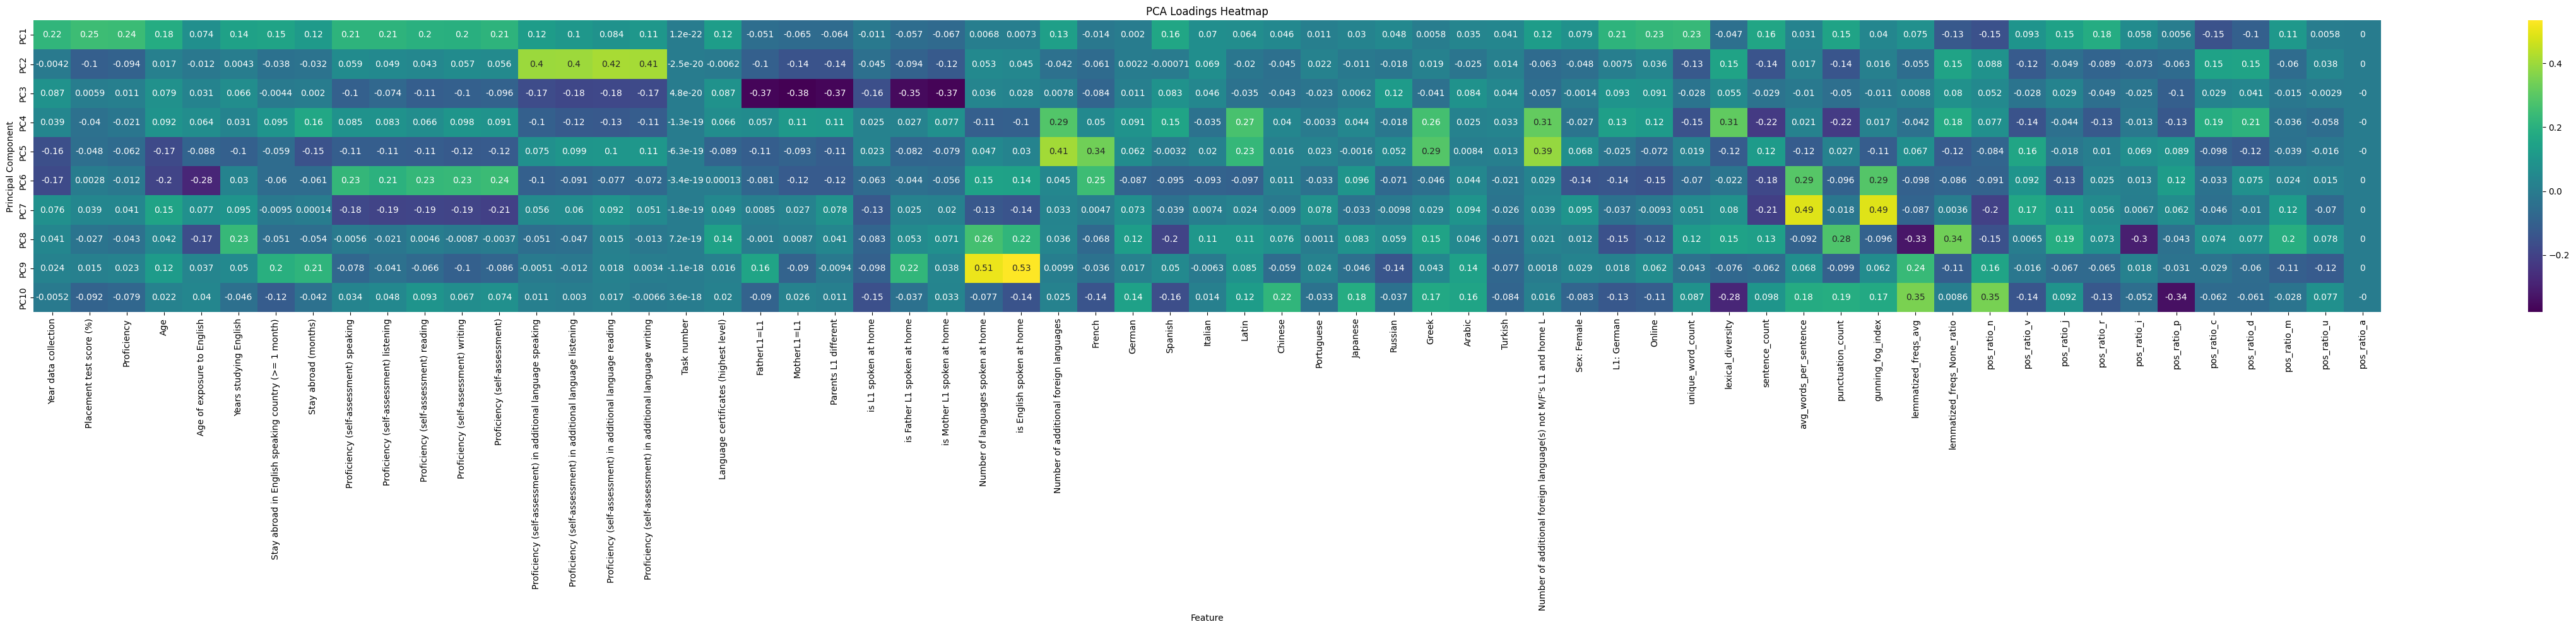

In [111]:

plt.figure(figsize=(60, 6))
sns.heatmap(pca.components_, annot=True, cmap='viridis',
            yticklabels=[f"PC{i+1}" for i in range(pca.components_.shape[0])],
            xticklabels=scaled_X.columns.tolist())
plt.title('PCA Loadings Heatmap')
plt.xlabel('Feature')
plt.ylabel('Principal Component')
plt.show()

In [112]:
PC1_loadings = pd.Series(pca.components_[0], index=scaled_X.columns, )

sorted_loadings = PC1_loadings.abs().sort_values(ascending=False)
sorted_loadings_series = PC1_loadings.loc[sorted_loadings.index]

sorted_loadings_series.index.name = 'feature'
sorted_loadings_series.name = 'coefficients of 1st PC loading'

sorted_loadings_series

feature
Placement test score (%)    2.472699e-01
Proficiency                 2.428607e-01
unique_word_count           2.340721e-01
Online                      2.275285e-01
Year data collection        2.178176e-01
                                ...     
pos_ratio_u                 5.755244e-03
pos_ratio_p                 5.601986e-03
German                      1.982347e-03
Task number                 1.201193e-22
pos_ratio_a                 0.000000e+00
Name: coefficients of 1st PC loading, Length: 63, dtype: float64

### Correlations

#### All

In [113]:
corr_matrix = X.corr()
corr_matrix

Year data collection  Placement test score (%)  \
Year data collection                    1.000000                  0.720421   
Placement test score (%)                0.720421                  1.000000   
Proficiency                             0.713770                  0.970773   
Age                                     0.705187                  0.545209   
Age of exposure to English              0.334990                  0.213857   
...                                          ...                       ...   
pos_ratio_c                            -0.301429                 -0.490832   
pos_ratio_d                            -0.194183                 -0.342749   
pos_ratio_m                             0.308693                  0.363490   
pos_ratio_u                            -0.006186                 -0.021786   
pos_ratio_a                                  NaN                       NaN   

                            Proficiency       Age  Age of exposure to English  \
Year data collection           0.713770  0.705187                    0.334990   
Placement test score (%)       0.970773  0.545209                    0.213857   
Proficiency                    1.000000  0.546501                    0.237844   
Age                            0.546501  1.000000                    0.487657   
Age of exposure to English     0.237844  0.487657                    1.000000   
...                                 ...       ...                         ...   
pos_ratio_c                   -0.466910 -0.243550                   -0.097328   
pos_ratio_d                   -0.315754 -0.158524                   -0.130067   
pos_ratio_m                    0.353987  0.200423                    0.057351   
pos_ratio_u                   -0.029688 -0.009559                   -0.008385   
pos_ratio_a                         NaN       NaN                         NaN   

                            Years studying English  \
Year data collection                      0.522896   
Placement test score (%)                  0.445424   
Proficiency                               0.433707   
Age                                       0.580488   
Age of exposure to English               -0.246458   
...                                            ...   
pos_ratio_c                              -0.198829   
pos_ratio_d                              -0.073513   
pos_ratio_m                               0.209843   
pos_ratio_u                               0.002966   
pos_ratio_a                                    NaN   

                            Stay abroad in English speaking country (>= 1 month)  \
Year data collection                                                 0.391936      
Placement test score (%)                                             0.454609      
Proficiency                                                          0.461438      
Age                                                                  0.394687      
Age of exposure to English                                           0.171849      
...                                                                       ...      
pos_ratio_c                                                         -0.206360      
pos_ratio_d                                                         -0.137314      
pos_ratio_m                                                          0.189238      
pos_ratio_u                                                         -0.026814      
pos_ratio_a                                                               NaN      

                            Stay abroad (months)  \
Year data collection                    0.314129   
Placement test score (%)                0.337552   
Proficiency                             0.345606   
Age                                     0.465878   
Age of exposure to English              0.226658   
...                                          ...   
pos_ratio_c                            -0.124810   
pos_ratio_d                            -0.10

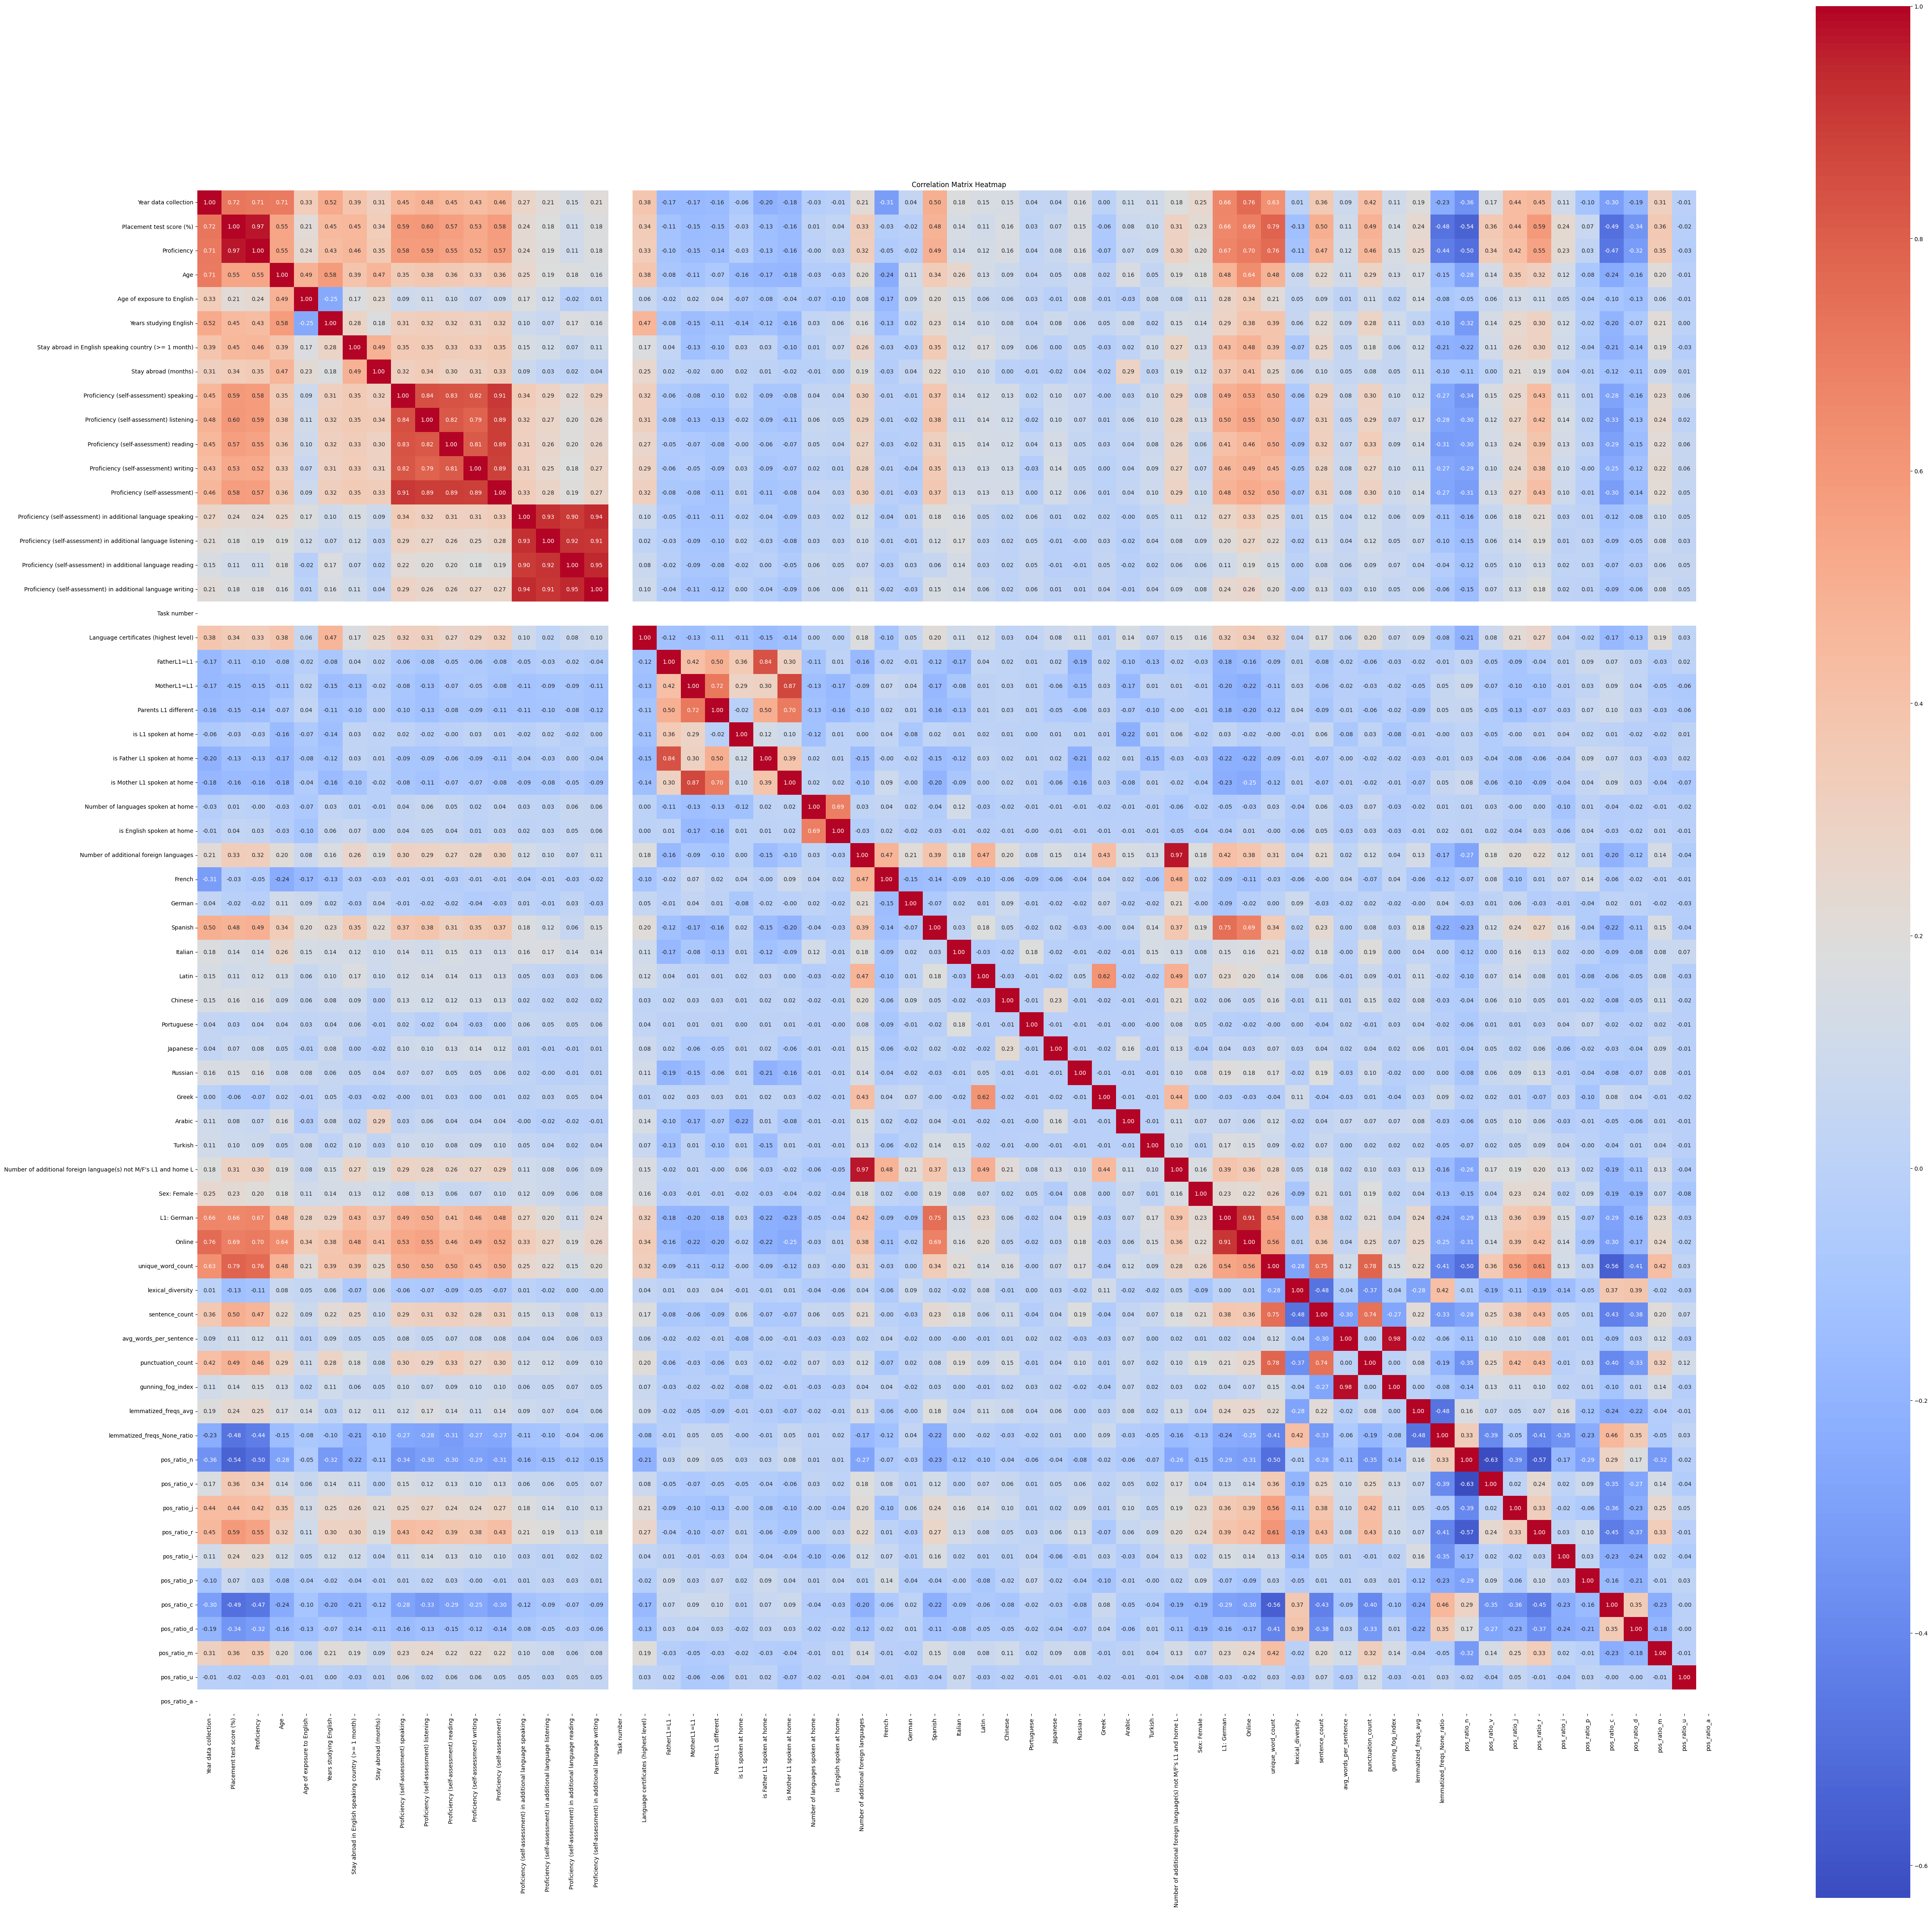

In [114]:
plt.figure(figsize=(60, 60))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [115]:
# Melt the correlation matrix into a long format
corr_long = pd.melt(corr_matrix.reset_index(), id_vars='index')
corr_long.columns = ['Feature_1', 'Feature_2', 'Correlation']

# Remove self-correlation and duplicate pairs
corr_long = corr_long[corr_long['Feature_1'] != corr_long['Feature_2']]
corr_long['Abs_Correlation'] = corr_long['Correlation'].abs()

# Sort by 'Abs_Correlation' column
corr_long_sorted = corr_long.sort_values(by='Abs_Correlation', ascending=False).reset_index(drop=True)

corr_long_sorted.head(60)


Feature_1  \
0                                   gunning_fog_index   
1                              avg_words_per_sentence   
2              Number of additional foreign languages   
3   Number of additional foreign language(s) not M...   
4                                         Proficiency   
5                            Placement test score (%)   
6   Proficiency (self-assessment) in additional la...   
7   Proficiency (self-assessment) in additional la...   
8   Proficiency (self-assessment) in additional la...   
9   Proficiency (self-assessment) in additional la...   
10  Proficiency (self-assessment) in additional la...   
11  Proficiency (self-assessment) in additional la...   
12  Proficiency (self-assessment) in additional la...   
13  Proficiency (self-assessment) in additional la...   
14  Proficiency (self-assessment) in additional la...   
15  Proficiency (self-assessment) in additional la...   
16                                         L1: German   
17                                             Online   
18                      Proficiency (self-assessment)   
19             Proficiency (self-assessment) speaking   
20  Proficiency (self-assessment) in additional la...   
21  Proficiency (self-assessment) in additional la...   
22              Proficiency (self-assessment) reading   
23                      Proficiency (self-assessment)   
24            Proficiency (self-assessment) listening   
25                      Proficiency (self-assessment)   
26                      Proficiency (self-assessment)   
27              Proficiency (self-assessment) writing   
28                                        MotherL1=L1   
29                        is Mother L1 spoken at home   
30            Proficiency (self-assessment) listening   
31             Proficiency (self-assessment) speaking   
32                        is Father L1 spoken at home   
33                                        FatherL1=L1   
34             Proficiency (self-assessment) speaking   
35              Proficiency (self-assessment) reading   
36              Proficiency (self-assessment) writing   
37             Proficiency (self-assessment) speaking   
38              Proficiency (self-assessment) reading   
39            Proficiency (self-assessment) listening   
40              Proficiency (self-assessment) reading   
41              Proficiency (self-assessment) writing   
42                                  unique_word_count   
43                           Placement test score (%)   
44            Proficiency (self-assessment) listening   
45              Proficiency (self-assessment) writing   
46                                  punctuation_count   
47                                  unique_word_count   
48                               Year data collection   
49                                             Online   
50                                        Proficiency   
51                                  unique_word_count   
52                                         L1: German   
53                                            Spanish   
54                                     sentence_count   
55                                  unique_word_count   
56                                     sentence_count   
57                                  punctuation_count   
58                               Year data collection   
59                           Placement test score (%)   

                                            Feature_2  Correlation  \
0                              avg_words_per_sentence     0.984956   
1                                   gunning_fog_index     0.984956   
2   Number of additional foreign language(s) not M...     0.974422   
3              Number of additional foreign languages     0.974422   
4                            Placement test score (%)     0.970773   
5                                         Proficiency     0.970773   
6   Proficiency (self-assessment) in additional la...     0.946481   
7   Pr

#### Network Graph

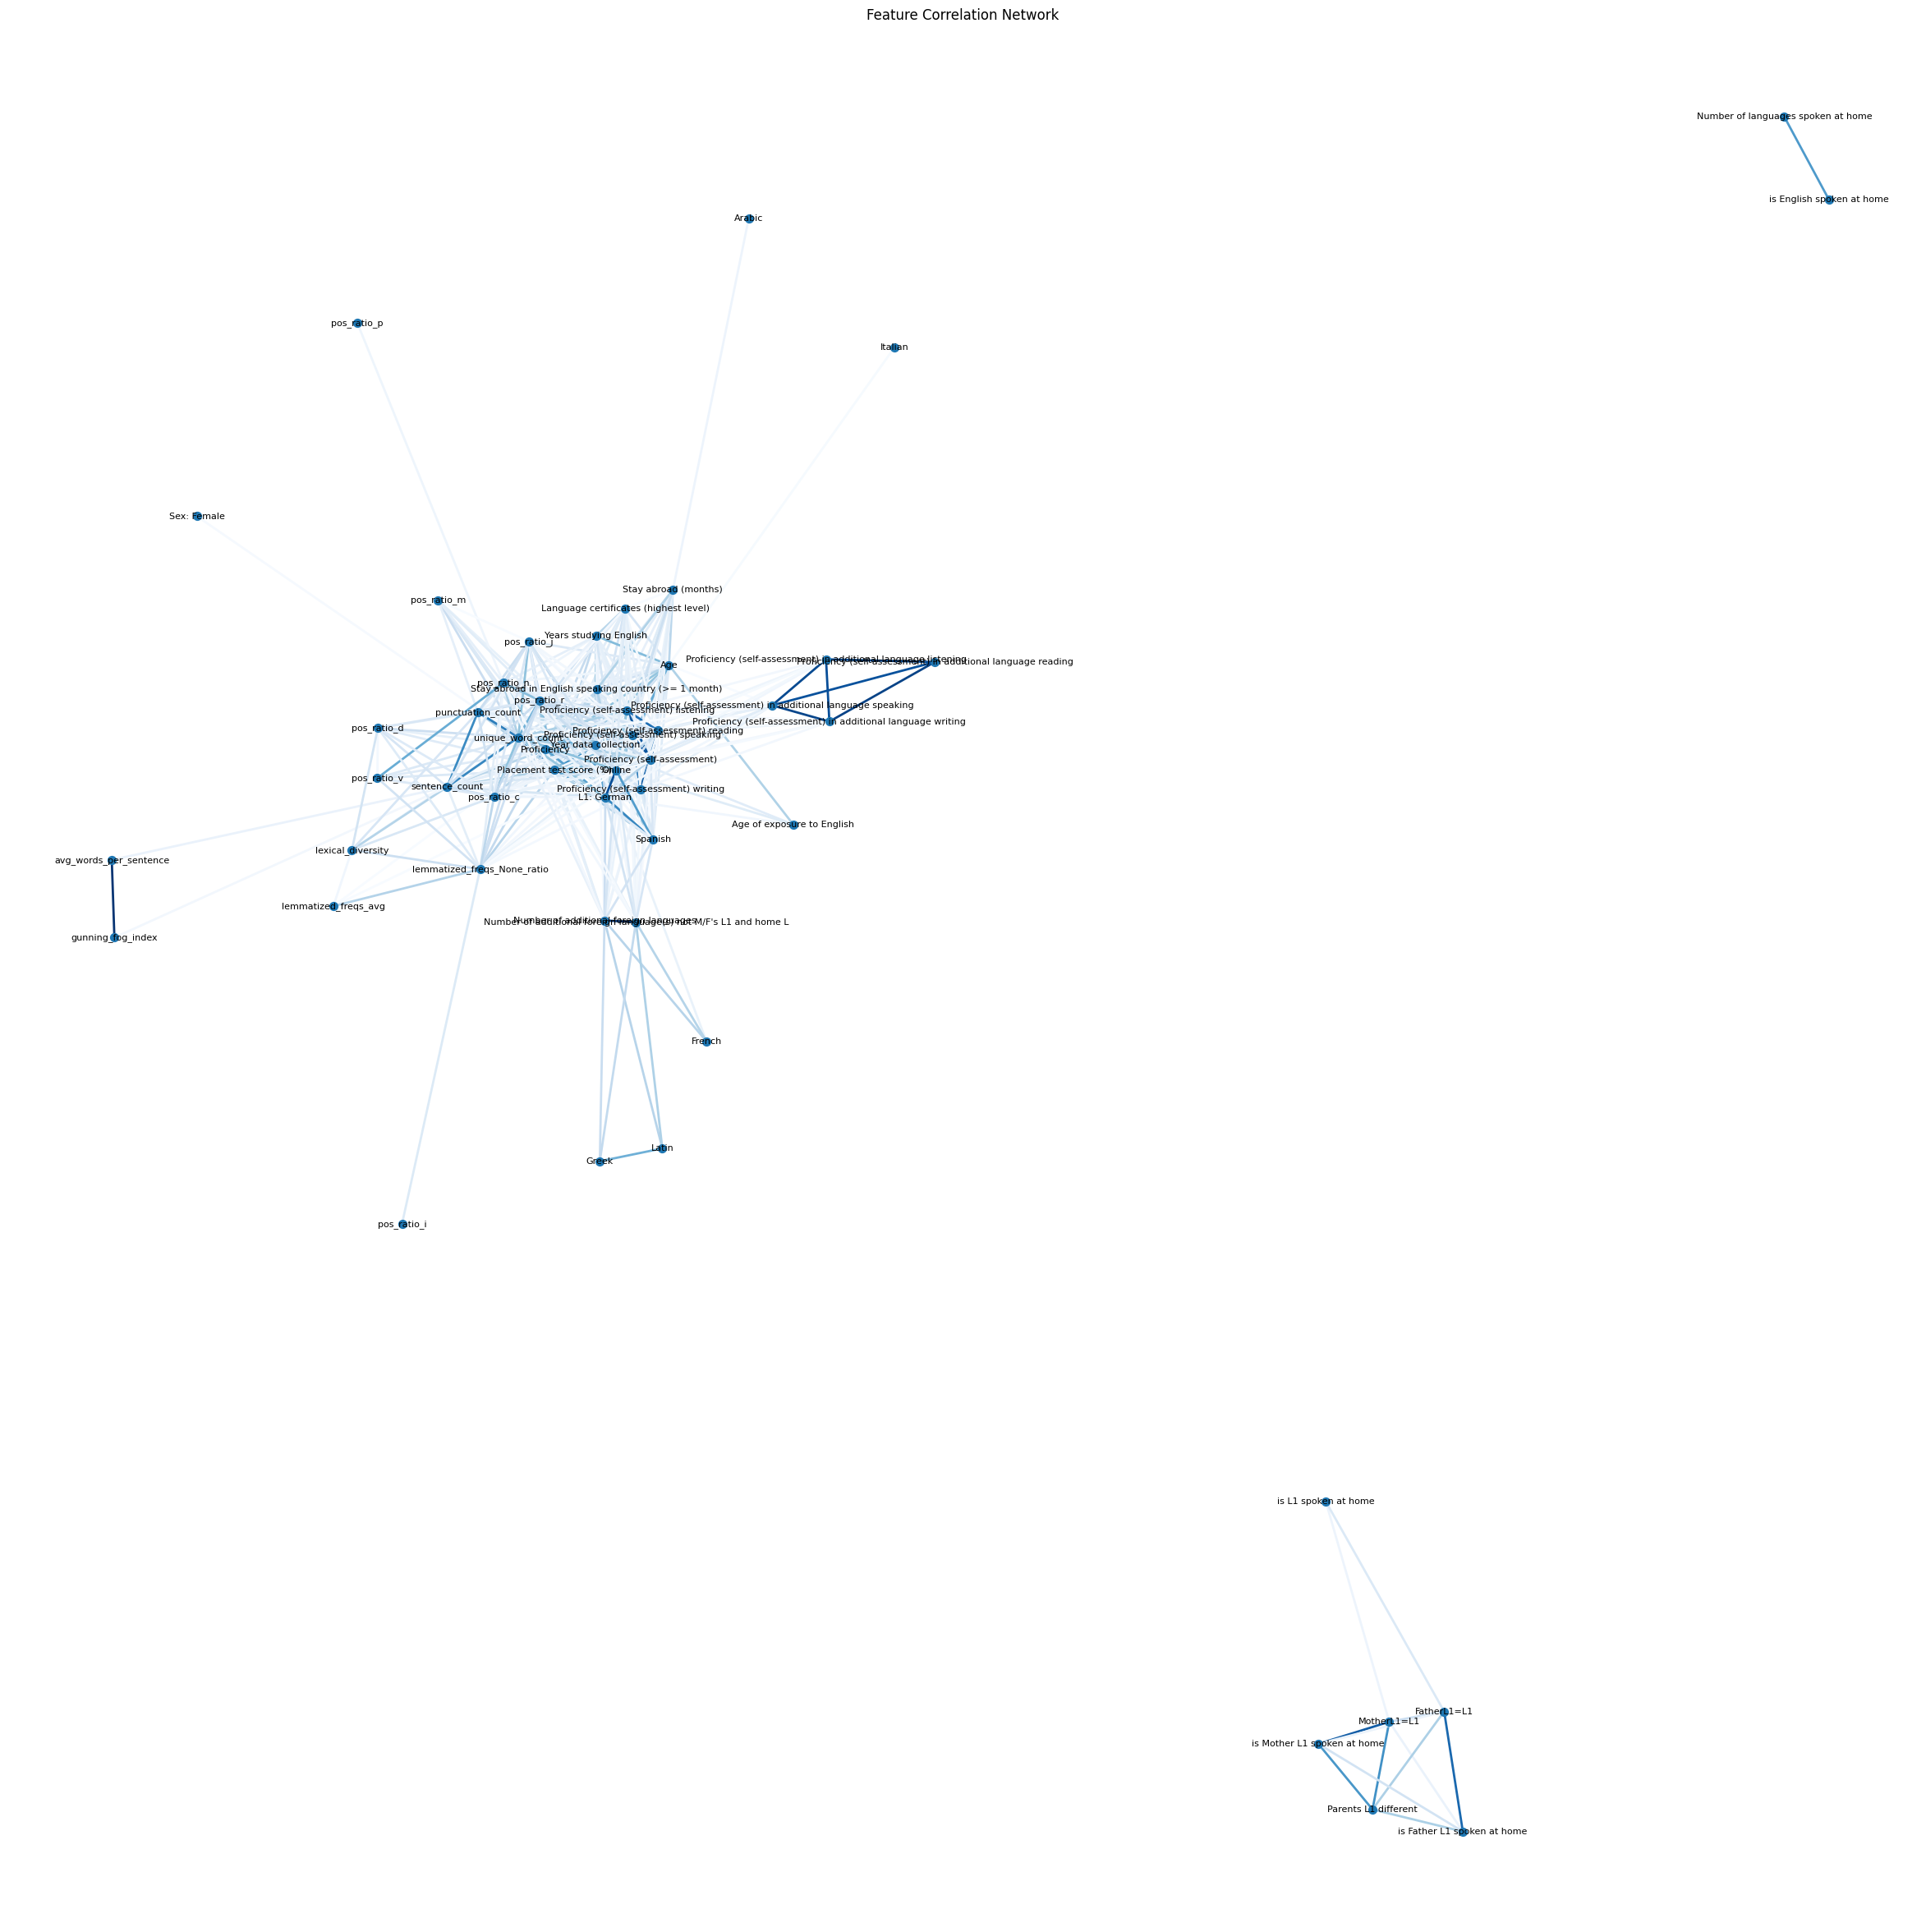

In [116]:
import matplotlib.colors as mcolors

# Filter for correlations greater than 0.25
significant_corr = corr_long[corr_long['Abs_Correlation'] > 0.25]

# Create the graph
G = nx.Graph()
for _, row in significant_corr.iterrows():
    G.add_edge(row['Feature_1'], row['Feature_2'], weight=row['Abs_Correlation'])

# Set up the plot size
plt.figure(figsize=(30, 30))

# Plotting
pos = nx.spring_layout(G)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=50)

# Color mapping: stronger correlations get darker colors
# Using a sequential colormap
cmap = plt.cm.Blues

# Normalize 'Abs_Correlation' to the [0, 1] range for color mapping
norm = mcolors.Normalize(vmin=0.25, vmax=1)

# Draw edges with color mapping
for edge in G.edges(data=True):
    color = cmap(norm(edge[2]['weight']))
    nx.draw_networkx_edges(G, pos, edgelist=[(edge[0], edge[1])], width=2, edge_color=[color])

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8)

# Set plot title and remove axis
plt.title('Feature Correlation Network')
plt.axis('off')

# Show the plot
plt.show()


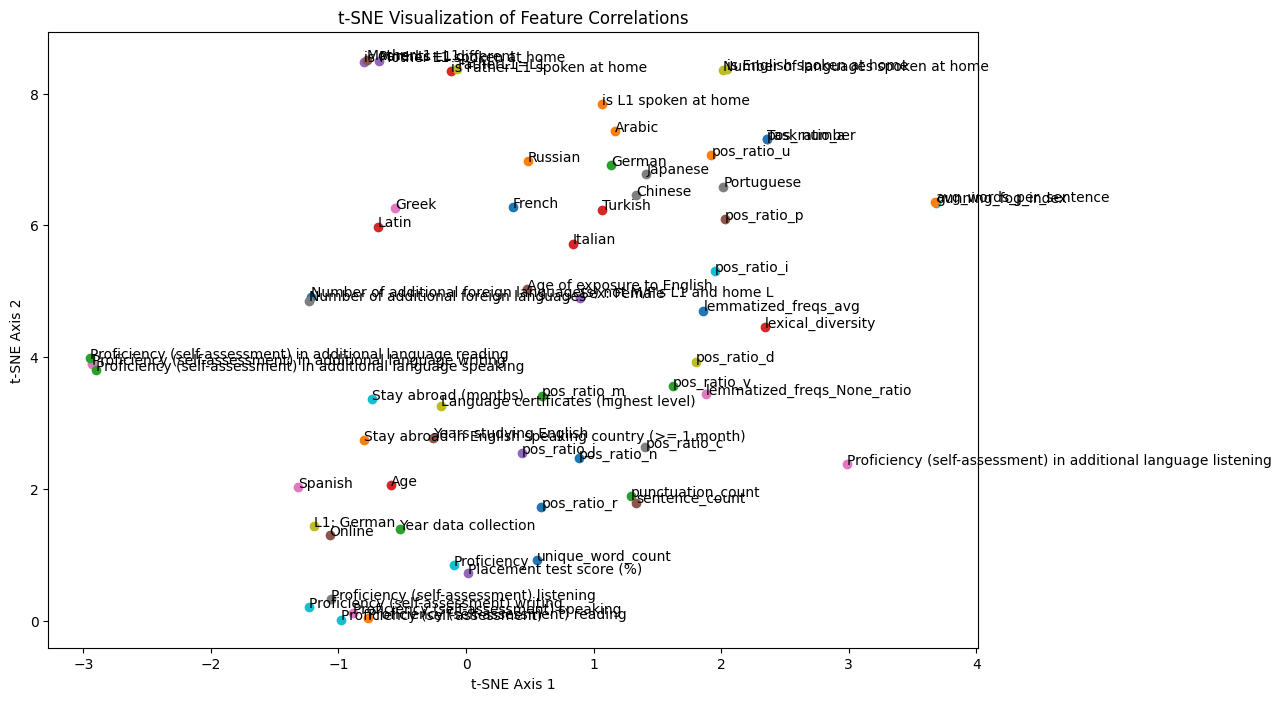

In [117]:
import numpy as np

from sklearn.manifold import TSNE

# Convert long format to full matrix
unique_features = list(set(corr_long['Feature_1']).union(set(corr_long['Feature_2'])))
corr_matrix = pd.DataFrame(data=np.nan, index=unique_features, columns=unique_features)

for _, row in corr_long.iterrows():
    corr_matrix.at[row['Feature_1'], row['Feature_2']] = row['Abs_Correlation']
    corr_matrix.at[row['Feature_2'], row['Feature_1']] = row['Abs_Correlation']

# Fill diagonal with 1s for self-correlation
np.fill_diagonal(corr_matrix.values, 1)

# Replace NaN with 0 (for non-existing correlations)
corr_matrix.fillna(0, inplace=True)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=3000)  # Adjust parameters as needed
tsne_results = tsne.fit_transform(corr_matrix)

# Plotting
plt.figure(figsize=(12, 8))
for idx, feature in enumerate(unique_features):
    plt.scatter(tsne_results[idx, 0], tsne_results[idx, 1])
    plt.annotate(feature, (tsne_results[idx, 0], tsne_results[idx, 1]))

plt.title('t-SNE Visualization of Feature Correlations')
plt.xlabel('t-SNE Axis 1')
plt.ylabel('t-SNE Axis 2')
plt.show()


#### Variables correlated with 'Placement test score (%)'

In [118]:
corr_matrix['Placement test score (%)'].sort_values(ascending = False).head(22)

Placement test score (%)                                1.000000
Proficiency                                             0.970773
unique_word_count                                       0.786743
Year data collection                                    0.720421
Online                                                  0.694578
L1: German                                              0.658021
Proficiency (self-assessment) listening                 0.597745
Proficiency (self-assessment) speaking                  0.592383
pos_ratio_r                                             0.590654
Proficiency (self-assessment)                           0.579113
Proficiency (self-assessment) reading                   0.573401
Age                                                     0.545209
pos_ratio_n                                             0.544548
Proficiency (self-assessment) writing                   0.528530
sentence_count                                          0.498752
pos_ratio_c              

Task 13 and 14
Placement test score (%)                                1.000000
Proficiency                                             0.975332
Proficiency (self-assessment) listening                 0.721785
Proficiency (self-assessment)                           0.717953
Proficiency (self-assessment) reading                   0.702926
Proficiency (self-assessment) speaking                  0.694717
unique_word_count                                       0.673704
Online                                                  0.657327
Proficiency (self-assessment) writing                   0.655027
Year data collection                                    0.644964
L1: German                                              0.580411
pos_ratio_r                                             0.528481
Task number                                             0.491240
Years studying English                                  0.476581
pos_ratio_v                                             0.443068
sentence_count                                          0.406404
Stay abroad in English speaking country (>= 1 month)    0.387592
Language certificates (highest level)                   0.344500
punctuation_count                                       0.335238
Age                                                     0.314207
Spanish                                                 0.310510
pos_ratio_j                                             0.253004
Name: Placement test score (%), dtype: float64

Task 13 only
Placement test score (%)                                1.000000
Proficiency                                             0.970773
unique_word_count                                       0.786743
Year data collection                                    0.720421
Online                                                  0.694578
L1: German                                              0.658021
Proficiency (self-assessment) listening                 0.597745
Proficiency (self-assessment) speaking                  0.592383
pos_ratio_r                                             0.590654
Proficiency (self-assessment)                           0.579113
Proficiency (self-assessment) reading                   0.573401
Age                                                     0.545209
pos_ratio_n                                             0.544548
Proficiency (self-assessment) writing                   0.528530
sentence_count                                          0.498752
pos_ratio_c                                             0.490832
punctuation_count                                       0.487022
Spanish                                                 0.483707
lemmatized_freqs_None_ratio                             0.475450
Stay abroad in English speaking country (>= 1 month)    0.454609
Years studying English                                  0.445424
pos_ratio_j                                             0.436546
Name: Placement test score (%), dtype: float64

Placement test score (%)                   1.000000
Proficiency                                0.969084
Proficiency (self-assessment)              0.696797
Proficiency (self-assessment) listening    0.669380
Proficiency (self-assessment) reading      0.647393
Proficiency (self-assessment) speaking     0.641451
Proficiency (self-assessment) writing      0.619290
L1: German                                 0.516939
lemmatized_freqs_avg                       0.472510
unique_word_count                          0.434695
sentence_count                             0.373095
pos_ratio_c                                0.337082
lemmatized_freqs_None_ratio                0.326902
pos_ratio_d                                0.298687
Years studying English                     0.268810
Language certificates (highest level)      0.268719
pos_ratio_p                                0.253468
pos_ratio_r                                0.250048
Spanish                                    0.223669
pos_ratio_v                                0.220485
punctuation_count                          0.193712
Age of exposure to English                 0.181685
Name: Placement test score (%), dtype: float64

In [119]:
corr_matrix['Placement test score (%)'].abs().sort_values(ascending=True).head(25)

Task number                                                     0.000000
pos_ratio_a                                                     0.000000
Number of languages spoken at home                              0.013646
German                                                          0.016218
pos_ratio_u                                                     0.021786
Portuguese                                                      0.025452
French                                                          0.029251
is L1 spoken at home                                            0.034659
is English spoken at home                                       0.038741
Greek                                                           0.064759
pos_ratio_p                                                     0.066655
Japanese                                                        0.073354
Arabic                                                          0.079635
Turkish                                            

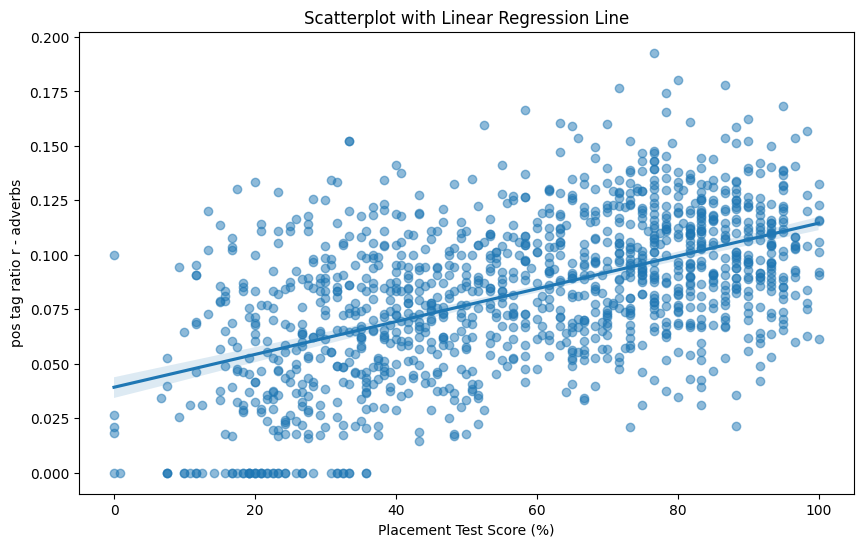

In [120]:
# Scatter plot with a linear regression line and confidence interval
plt.figure(figsize=(10, 6))
sns.regplot(x='Placement test score (%)', y='pos_ratio_r', data=workable_data, scatter_kws={'alpha':0.5})
plt.title('Scatterplot with Linear Regression Line')
plt.xlabel('Placement Test Score (%)')
plt.ylabel('pos tag ratio r - adverbs')
plt.show()


In [121]:
from scipy.stats import ttest_ind, f_oneway
group1 = workable_data[workable_data['Placement test score (%)'] < 0.5 ]['pos_ratio_r']
group2 = workable_data[workable_data['Placement test score (%)'] >= 0.5 ]['pos_ratio_r']
t_stat, p_value = ttest_ind(group1, group2)
print(t_stat)
print(p_value)

-3.1669929497959712
0.0015770817064646495


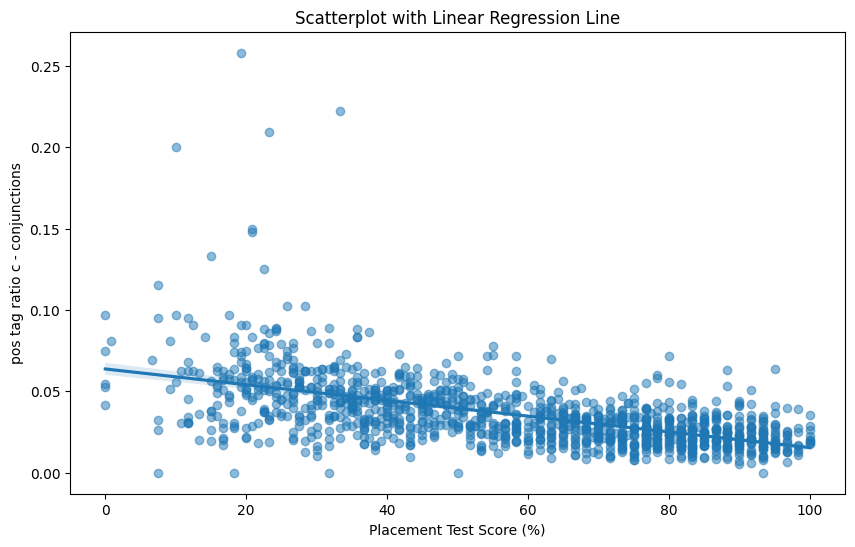

In [122]:
# Scatter plot with a linear regression line and confidence interval
plt.figure(figsize=(10, 6))
sns.regplot(x='Placement test score (%)', y='pos_ratio_c', data=workable_data, scatter_kws={'alpha':0.5})
plt.title('Scatterplot with Linear Regression Line')
plt.xlabel('Placement Test Score (%)')
plt.ylabel('pos tag ratio c - conjunctions')
plt.show()


In [123]:
from scipy.stats import ttest_ind, f_oneway
group1 = workable_data[workable_data['Placement test score (%)'] < 0.5 ]['pos_ratio_c']
group2 = workable_data[workable_data['Placement test score (%)'] >= 0.5 ]['pos_ratio_c']
t_stat, p_value = ttest_ind(group1, group2)
print(t_stat)
print(p_value)

3.006770937623914
0.0026925189502517884


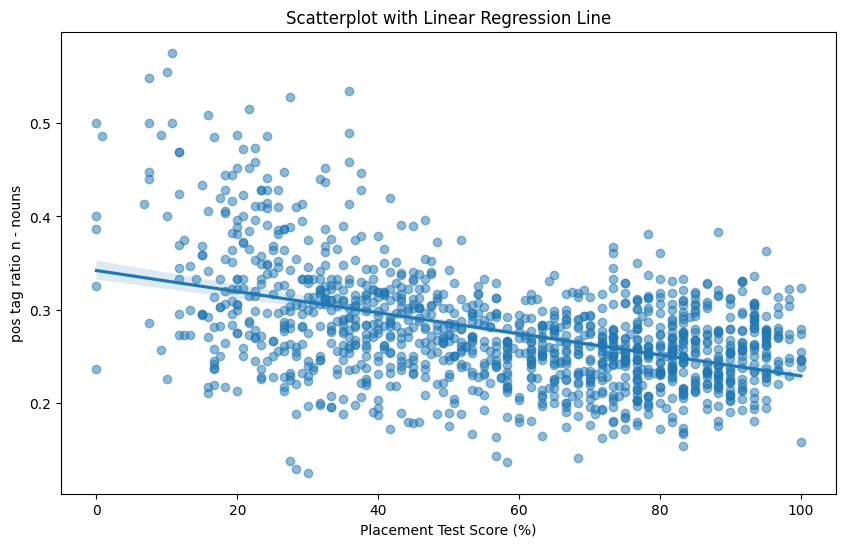

In [124]:
# Scatter plot with a linear regression line and confidence interval
plt.figure(figsize=(10, 6))
sns.regplot(x='Placement test score (%)', y='pos_ratio_n', data=workable_data, scatter_kws={'alpha':0.5})
plt.title('Scatterplot with Linear Regression Line')
plt.xlabel('Placement Test Score (%)')
plt.ylabel('pos tag ratio n - nouns')
plt.show()


In [125]:
from scipy.stats import ttest_ind, f_oneway
group1 = workable_data[workable_data['Placement test score (%)'] < 0.5 ]['pos_ratio_n']
group2 = workable_data[workable_data['Placement test score (%)'] >= 0.5 ]['pos_ratio_n']
t_stat, p_value = ttest_ind(group1, group2)
print(t_stat)
print(p_value)

3.422330581265607
0.0006407123255571302


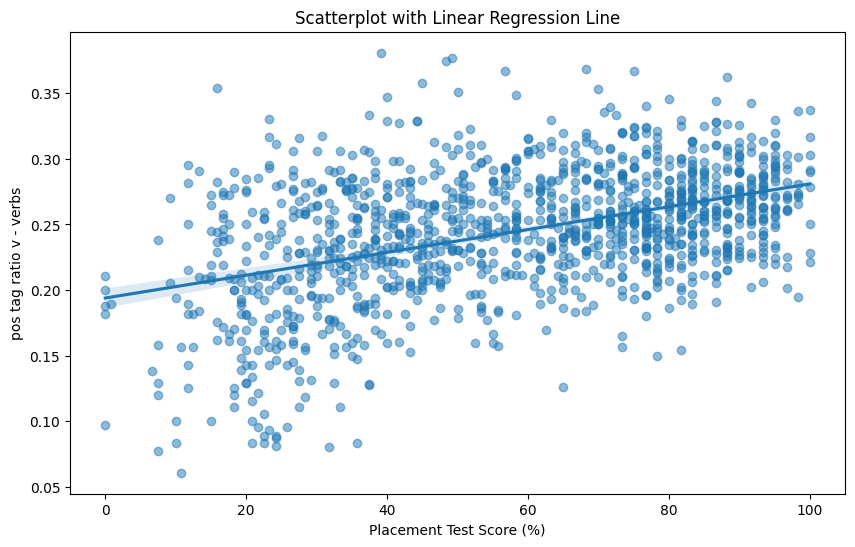

In [126]:
# Scatter plot with a linear regression line and confidence interval
plt.figure(figsize=(10, 6))
sns.regplot(x='Placement test score (%)', y='pos_ratio_v', data=workable_data, scatter_kws={'alpha':0.5})
plt.title('Scatterplot with Linear Regression Line')
plt.xlabel('Placement Test Score (%)')
plt.ylabel('pos tag ratio v - verbs')
plt.show()


In [127]:
from scipy.stats import ttest_ind, f_oneway
group1 = workable_data[workable_data['Placement test score (%)'] < 0.5 ]['pos_ratio_v']
group2 = workable_data[workable_data['Placement test score (%)'] >= 0.5 ]['pos_ratio_v']
t_stat, p_value = ttest_ind(group1, group2)
print(t_stat)
print(p_value)

-3.180889577967882
0.0015039304284782892


## Prepare data for ML

### Distributions

In [9]:
workable_data.columns

Index(['Year data collection', 'Placement test score (%)', 'Proficiency',
       'Age', 'Age of exposure to English', 'Years studying English',
       'Stay abroad in English speaking country (>= 1 month)',
       'Stay abroad (months)', 'Proficiency (self-assessment) speaking',
       'Proficiency (self-assessment) listening',
       'Proficiency (self-assessment) reading',
       'Proficiency (self-assessment) writing',
       'Proficiency (self-assessment)',
       'Proficiency (self-assessment) in additional language speaking',
       'Proficiency (self-assessment) in additional language listening',
       'Proficiency (self-assessment) in additional language reading',
       'Proficiency (self-assessment) in additional language writing',
       'Task number', 'Language certificates (highest level)', 'FatherL1=L1',
       'MotherL1=L1', 'Parents L1 different', 'is L1 spoken at home',
       'is Father L1 spoken at home', 'is Mother L1 spoken at home',
       'Number of languages sp

#### L1

In [10]:
workable_data['L1: German'].value_counts()

L1: German
0    1182
1     274
Name: count, dtype: int64

In [11]:
workable_data['L1: German'].value_counts(normalize=True)

L1: German
0    0.811813
1    0.188187
Name: proportion, dtype: float64

In [12]:
workable_data['Age'].value_counts()

Age
21.0    208
19.0    148
20.0    142
18.0    116
22.0    115
16.0     95
15.0     92
14.0     84
23.0     75
13.0     70
17.0     66
12.0     42
24.0     38
25.0     31
26.0     19
28.0     14
27.0     12
29.0      8
33.0      7
36.0      6
41.0      5
52.0      5
31.0      5
46.0      4
35.0      3
57.0      3
40.0      3
50.0      3
37.0      3
60.0      3
32.0      3
53.0      3
48.0      3
34.0      2
30.0      2
45.0      2
39.0      2
49.0      2
56.0      1
42.0      1
55.0      1
58.0      1
44.0      1
51.0      1
61.0      1
16.6      1
59.0      1
38.0      1
62.0      1
47.0      1
Name: count, dtype: int64

In [13]:
workable_data['Age'].mean()

20.312225274725275

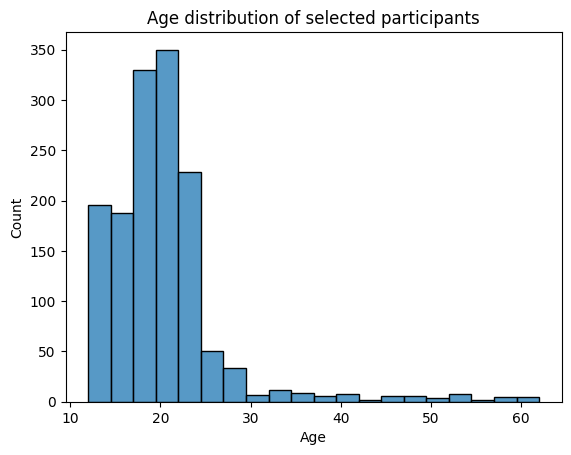

In [6]:
sns.histplot(workable_data['Age'], kde=False, bins=20)
plt.title('Age distribution of selected participants')
plt.show()

#### Age of exposure to English

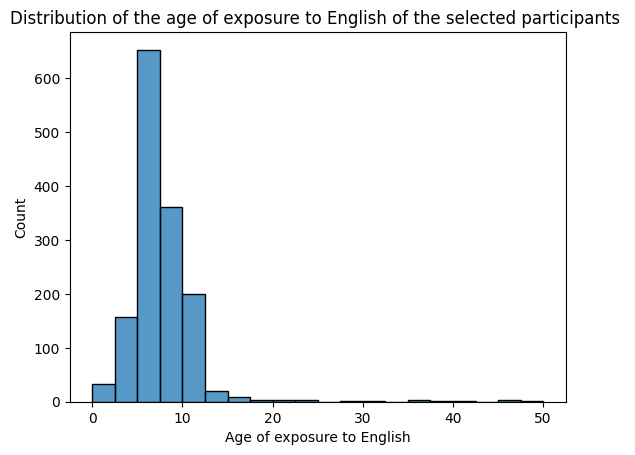

In [8]:
sns.histplot(workable_data['Age of exposure to English'], kde=False, bins=20)
plt.title('Distribution of the age of exposure to English of the selected participants ')
plt.show()

In [20]:
workable_data['Age of exposure to English'].mean()

7.373626373626373

### Train test split

In [6]:
workable_data['Proficiency'] = workable_data['Proficiency'].apply(lambda x: x-1)

In [7]:
from sklearn.model_selection import train_test_split

data_1 = workable_data[workable_data['Proficiency'] == 0]
data_2 = workable_data[workable_data['Proficiency'] == 1]
data_3 = workable_data[workable_data['Proficiency'] == 2]
data_4 = workable_data[workable_data['Proficiency'] == 3]
data_5 = workable_data[workable_data['Proficiency'] == 4]
data_6 = workable_data[workable_data['Proficiency'] == 5]


train_1, test_1 = train_test_split(data_1, test_size=50, random_state=1)
train_2, test_2 = train_test_split(data_2, test_size=50, random_state=1)
train_3, test_3 = train_test_split(data_3, test_size=50, random_state=1)
train_4, test_4 = train_test_split(data_4, test_size=50, random_state=1)
train_5, test_5 = train_test_split(data_5, test_size=50, random_state=1)
train_6, test_6 = train_test_split(data_6, test_size=50, random_state=1)

train = pd.concat([train_1, train_2, train_3, train_4, train_5, train_6])
test = pd.concat([test_1, test_2, test_3, test_4, test_5, test_6])

print(len(train))
print(len(test))
print(test['Proficiency'].value_counts())

1156
300
Proficiency
0    50
1    50
2    50
3    50
4    50
5    50
Name: count, dtype: int64


In [8]:
y_test_multiclass = test['Proficiency']
y_test_multiclass.value_counts()

Proficiency
0    50
1    50
2    50
3    50
4    50
5    50
Name: count, dtype: int64

### SMOTE on train

In [6]:
!pip install imbalanced-learn

In [14]:
y_train = train['Placement test score (%)']
X_train = train.drop(columns=['Placement test score (%)'])

In [16]:
from imblearn.over_sampling import SMOTE

# Assuming df is your DataFrame and 'target' is the name of your target column
X_train = train.drop('Proficiency', axis=1)  # Features
y_train = train['Proficiency']               # Target variable

# Applying SMOTE
smote = SMOTE(sampling_strategy={0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, }, random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Now, X_train_smote and y_train_smote have the adjusted classes


In [17]:
train_smote = pd.concat([X_train_smote, y_train_smote], axis = 1)

In [18]:
train_smote['Placement test score (%)'].mean()

61.37955071122306

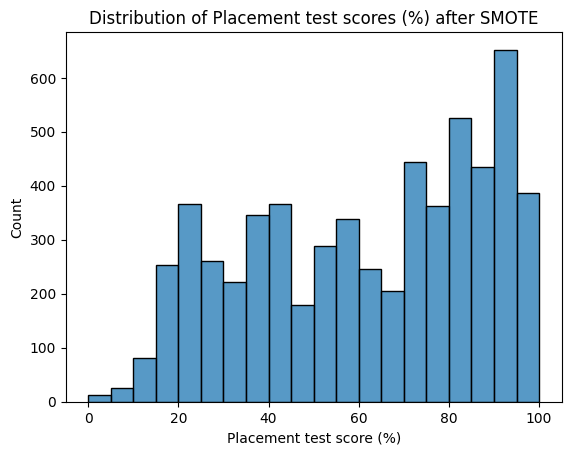

In [19]:
sns.histplot(train_smote['Placement test score (%)'], kde=False, bins=20)
plt.title('Distribution of Placement test scores (%) after SMOTE')
plt.show()

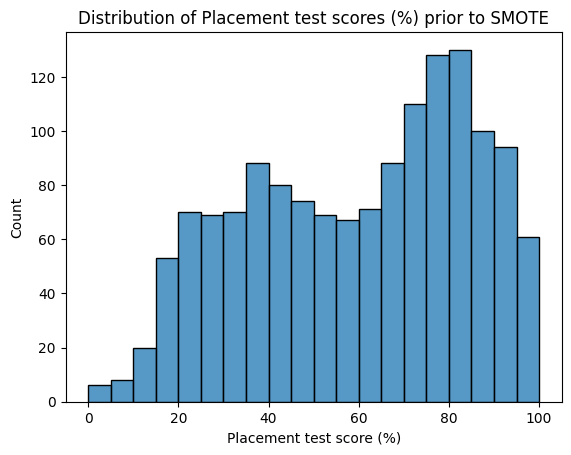

In [20]:
sns.histplot(workable_data['Placement test score (%)'], kde=False, bins=20)
plt.title('Distribution of Placement test scores (%) prior to SMOTE')
plt.show()

In [21]:
workable_data['Placement test score (%)'].mean()

59.190453296703296

### Select Target and Features

In [22]:
file_name = 'train_smote.csv'
train_smote.to_csv(file_name, index=False)


In [23]:
train_smote = pd.read_csv('train_smote.csv')
train_smote.head(5)

Year data collection  Placement test score (%)   Age  \
0                  2012                      18.3  13.0   
1                  2018                      16.7  22.0   
2                  2012                      26.7  17.0   
3                  2012                      15.8  17.0   
4                  2012                      19.2  12.0   

   Age of exposure to English  Years studying English  \
0                         4.0                     9.0   
1                         4.0                    18.0   
2                        10.0                     7.0   
3                         7.0                    10.0   
4                         6.0                     6.0   

   Stay abroad in English speaking country (>= 1 month)  Stay abroad (months)  \
0                                                  0                      0.0   
1                                                  1                      9.0   
2                                                  0                      0.0   
3                                                  0                      0.0   
4                                                  0                      0.0   

   Proficiency (self-assessment) speaking  \
0                                     3.0   
1                                     5.0   
2                                     2.0   
3                                     3.0   
4                                     4.0   

   Proficiency (self-assessment) listening  \
0                                      3.0   
1                                      5.0   
2                                      2.0   
3                                      3.0   
4                                      3.0   

   Proficiency (self-assessment) reading  ...  pos_ratio_j  pos_ratio_r  \
0                                    3.0  ...     0.000000     0.027778   
1                                    5.0  ...     0.086022     0.107527   
2                                    2.0  ...     0.064516     0.064516   
3                                    4.0  ...     0.062500     0.083333   
4                                    5.0  ...     0.037037     0.037037   

   pos_ratio_i  pos_ratio_p  pos_ratio_c  pos_ratio_d  pos_ratio_m  \
0     0.111111     0.027778     0.083333     0.055556     0.000000   
1     0.096774     0.064516     0.021505     0.053763     0.010753   
2     0.129032     0.064516     0.048387     0.016129     0.000000   
3     0.104167     0.083333     0.041667     0.041667     0.000000   
4     0.074074     0.037037     0.074074     0.037037     0.000000   

   pos_ratio_u  pos_ratio_a  Proficiency  
0          0.0          0.0            0  
1          0.0          0.0            0  
2          0.0          0.0            0  
3          0.0          0.0            0  
4          0.0          0.0            0  

[5 rows x 63 columns]

In [24]:
y_train_multiclass = train_smote['Proficiency']

In [25]:
y_test_multiclass

313     0
441     0
367     0
336     0
470     0
       ..
254     5
1425    5
1427    5
225     5
240     5
Name: Proficiency, Length: 300, dtype: int64

In [26]:
train_smote.drop(columns=['Proficiency'], inplace=True)

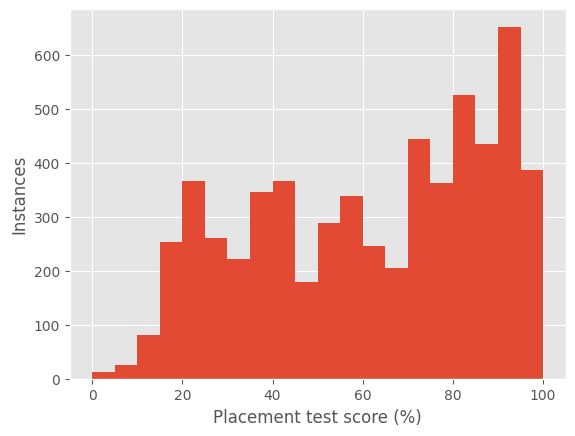

In [27]:
# Getting X and y
X_train = train_smote.drop('Placement test score (%)', axis=1)
y_train = train_smote['Placement test score (%)']

import matplotlib.pyplot as plt
%matplotlib inline

# Plotting the target variable Proficiency
plt.style.use("ggplot")
plt.hist(x=y_train, bins=20)
plt.xlabel('Placement test score (%)')
plt.ylabel("Instances")
plt.show()

In [28]:
y_test = test['Placement test score (%)']
X_test = test.drop(columns=['Placement test score (%)'])

### Binary encode proficiency

In [45]:
y_train_binary = y_train.apply(lambda x: 0 if x <= 65 else 1)
y_test_binary = y_test.apply(lambda x: 0 if x <= 65 else 1)
print( y_train_binary.value_counts() )
print( y_test_binary.value_counts() )

Placement test score (%)
0    3026
1    2974
Name: count, dtype: int64
Placement test score (%)
0    152
1    148
Name: count, dtype: int64


In [30]:
X_test.drop(columns=['Proficiency'], inplace = True)


In [31]:
X_train = X_train.drop(columns=[
    'Proficiency (self-assessment) speaking',
    'Proficiency (self-assessment) listening',
    'Proficiency (self-assessment) reading',
    'Proficiency (self-assessment) writing',
    'Proficiency (self-assessment)',
    'Proficiency (self-assessment) in additional language speaking',
    'Proficiency (self-assessment) in additional language listening',
    'Proficiency (self-assessment) in additional language reading',
    'Proficiency (self-assessment) in additional language writing'
])

X_test = X_test.drop(columns=[
    'Proficiency (self-assessment) speaking',
    'Proficiency (self-assessment) listening',
    'Proficiency (self-assessment) reading',
    'Proficiency (self-assessment) writing',
    'Proficiency (self-assessment)',
    'Proficiency (self-assessment) in additional language speaking',
    'Proficiency (self-assessment) in additional language listening',
    'Proficiency (self-assessment) in additional language reading',
    'Proficiency (self-assessment) in additional language writing'
])

In [32]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')


## Model Selection

### DecisionTreeClassifier

#### multi class

##### Model tuning

In [33]:
# Looking at the algorithm DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# Dividing the data in a train and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)


# Defining the algorithm
tree = DecisionTreeClassifier(random_state=0)
param_grid_tree = {"max_depth": [i for i in range(1,10)]}


grid_search_tree = GridSearchCV(tree, param_grid_tree, cv=5)
grid_search_tree.fit(X_train, y_train_multiclass)


print("Results for the model Decision Tree: \n")
print("Best parameter: {}".format(grid_search_tree.best_params_))
print("Best cross_validation score: {:.2f}".format(grid_search_tree.best_score_))
print("done")

Results for the model Decision Tree: 

Best parameter: {'max_depth': 9}
Best cross_validation score: 0.69
done


##### Results

In [34]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Results for the model Decision Tree: \n ")

# Calculating the accuracy on both the training and test set
print("Accuracy on train set: {}".format(grid_search_tree.score(X_train, y_train_multiclass)))
print("Accuracy on test set: {}".format(grid_search_tree.score(X_test, y_test_multiclass)))
print("--------------------------------")


# Setting up for the confusion matrix/precision/f1-score
pred_grid_search_train = grid_search_tree.predict(X_train)
pred_grid_search_test = grid_search_tree.predict(X_test)

# Calculating precision
print("precision on train set: {:.2f}".format(precision_score(y_train, pred_grid_search_train, average='macro', zero_division=1)))
print("precision on test set: {:.2f}".format(precision_score(y_test, pred_grid_search_test, average='macro', zero_division=1)))
print("--------------------------------")

# Calculating recall
print("recall on train set: {:.2f}".format(recall_score(y_train, pred_grid_search_train, average='macro', zero_division=1)))
print("recall on test set: {:.2f}".format(recall_score(y_test, pred_grid_search_test, average='macro', zero_division=1)))
print("--------------------------------")

# Calculating the f1-score
print("f1-score on train set: {:.2f}".format(f1_score(y_train, pred_grid_search_train, average="macro", zero_division=1)))
print("f1-score on test set: {:.2f}".format(f1_score(y_test, pred_grid_search_test, average="macro", zero_division=1)))
print("--------------------------------")

confusion_train = confusion_matrix(y_train_multiclass, pred_grid_search_train)
confusion_test = confusion_matrix(y_test_multiclass, pred_grid_search_test)

# Showing the confusion matrices
print("Confusion matrix on train set: \n{}".format(confusion_train))
print("--------------------------------")
print("Confusion matrix on test set: \n{}".format(confusion_test))

Results for the model Decision Tree: 
 
Accuracy on train set: 0.7975
Accuracy on test set: 0.3933333333333333
--------------------------------
precision on train set: 0.94
precision on test set: 0.93
--------------------------------
recall on train set: 0.02
recall on test set: 0.07
--------------------------------
f1-score on train set: 0.04
f1-score on test set: 0.00
--------------------------------
Confusion matrix on train set: 
[[872  64  14  27  21   2]
 [ 49 806  66  58  19   2]
 [  8  71 729 116  66  10]
 [ 11  14  89 680 166  40]
 [  3   3  35  65 842  52]
 [  0   5   6  31 102 856]]
--------------------------------
Confusion matrix on test set: 
[[36 10  0  1  3  0]
 [13 17 13  2  4  1]
 [ 6 13 11  7  8  5]
 [ 1  2 12 18 13  4]
 [ 0  0  4 17 20  9]
 [ 0  1  1  8 24 16]]


#### binary

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Assuming the data is already loaded into X_train, X_test, y_train, y_test

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Define a grid of parameters for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search for hyperparameter tuning
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train_binary)

# Best parameters found
best_params = grid_search.best_params_
best_dt_classifier = grid_search.best_estimator_

# Predict on the test set
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the classifier
evaluation_report = classification_report(y_test_binary, y_pred)

best_params, evaluation_report



Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1

({'criterion': 'entropy',
  'max_depth': 15,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 '              precision    recall  f1-score   support\n\n           0       0.81      0.82      0.81       152\n           1       0.81      0.80      0.81       148\n\n    accuracy                           0.81       300\n   macro avg       0.81      0.81      0.81       300\nweighted avg       0.81      0.81      0.81       300\n')

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize the Decision Tree Classifier with your specific parameters
dt_classifier = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=15, 
    min_samples_leaf=1, 
    min_samples_split=2
)

# Train the model using your training data
dt_classifier.fit(X_train, y_train_binary)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the classifier
evaluation_report = classification_report(y_test_binary, y_pred)

print(evaluation_report)


              precision    recall  f1-score   support

           0       0.82      0.82      0.82       152
           1       0.82      0.81      0.81       148

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depths = range(1, 20)
models = {}
accuracy_scores = {}

for depth in depths:
    # Create a Decision Tree classifier with the specified depth
    dt_classifier = DecisionTreeClassifier(max_depth=depth)

    # Train the model
    dt_classifier.fit(X_train, y_train_binary)

    # Store the model
    models[depth] = dt_classifier

    # Make predictions on the test set
    y_pred = dt_classifier.predict(X_test)

    # Calculate and store accuracy
    accuracy = accuracy_score(y_test_binary, y_pred)
    accuracy_scores[depth] = accuracy
    print(f"Accuracy for depth {depth}: {accuracy}")

# You can access each model and its accuracy from models and accuracy_scores dictionaries


Accuracy for depth 1: 0.77
Accuracy for depth 2: 0.76
Accuracy for depth 3: 0.7966666666666666
Accuracy for depth 4: 0.81
Accuracy for depth 5: 0.8433333333333334
Accuracy for depth 6: 0.8133333333333334
Accuracy for depth 7: 0.8366666666666667
Accuracy for depth 8: 0.81
Accuracy for depth 9: 0.8266666666666667
Accuracy for depth 10: 0.8166666666666667
Accuracy for depth 11: 0.8166666666666667
Accuracy for depth 12: 0.7666666666666667
Accuracy for depth 13: 0.8033333333333333
Accuracy for depth 14: 0.7833333333333333
Accuracy for depth 15: 0.82
Accuracy for depth 16: 0.81
Accuracy for depth 17: 0.8033333333333333
Accuracy for depth 18: 0.8066666666666666
Accuracy for depth 19: 0.8066666666666666


Highest accuracy at depth 15

##### Model tuning

#### New

In [35]:
y_train

0       18
1       16
2       26
3       15
4       19
        ..
5995    98
5996    91
5997    97
5998    93
5999    92
Name: Placement test score (%), Length: 6000, dtype: int64

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Assuming the data is already loaded into X_train, X_test, y_train, y_test

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Define a grid of parameters for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search for hyperparameter tuning
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train_multiclass)

# Best parameters found
best_params = grid_search.best_params_
best_dt_classifier = grid_search.best_estimator_

# Predict on the test set
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the classifier
evaluation_report = classification_report(y_test_multiclass, y_pred)

best_params, evaluation_report



Fitting 5 folds for each of 90 candidates, totalling 450 fits


[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=g

({'criterion': 'entropy',
  'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 '              precision    recall  f1-score   support\n\n           0       0.62      0.52      0.57        50\n           1       0.39      0.48      0.43        50\n           2       0.24      0.22      0.23        50\n           3       0.27      0.34      0.30        50\n           4       0.30      0.34      0.32        50\n           5       0.58      0.36      0.44        50\n\n    accuracy                           0.38       300\n   macro avg       0.40      0.38      0.38       300\nweighted avg       0.40      0.38      0.38       300\n')

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize the Decision Tree Classifier with your specific parameters
dt_classifier = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=20, 
    min_samples_leaf=1, 
    min_samples_split=2
)

# Train the model using your training data
dt_classifier.fit(X_train, y_train_multiclass)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the classifier
evaluation_report = classification_report(y_test_multiclass, y_pred)

print(evaluation_report)


              precision    recall  f1-score   support

           0       0.60      0.54      0.57        50
           1       0.36      0.40      0.38        50
           2       0.27      0.24      0.25        50
           3       0.27      0.36      0.31        50
           4       0.35      0.40      0.37        50
           5       0.52      0.32      0.40        50

    accuracy                           0.38       300
   macro avg       0.39      0.38      0.38       300
weighted avg       0.39      0.38      0.38       300



In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
models = {}
accuracy_scores = {}

for depth in depths:
    # Create a Decision Tree classifier with the specified depth
    dt_classifier = DecisionTreeClassifier(max_depth=depth)

    # Train the model
    dt_classifier.fit(X_train, y_train_multiclass)

    # Store the model
    models[depth] = dt_classifier

    # Make predictions on the test set
    y_pred = dt_classifier.predict(X_test)

    # Calculate and store accuracy
    accuracy = accuracy_score(y_test_multiclass, y_pred)
    accuracy_scores[depth] = accuracy
    print(f"Accuracy for depth {depth}: {accuracy}")

# You can access each model and its accuracy from models and accuracy_scores dictionaries


Accuracy for depth 1: 0.30666666666666664
Accuracy for depth 2: 0.43666666666666665
Accuracy for depth 3: 0.44
Accuracy for depth 4: 0.38333333333333336
Accuracy for depth 5: 0.4166666666666667
Accuracy for depth 6: 0.3933333333333333
Accuracy for depth 7: 0.38
Accuracy for depth 8: 0.38333333333333336
Accuracy for depth 9: 0.38666666666666666
Accuracy for depth 10: 0.4066666666666667
Accuracy for depth 11: 0.3933333333333333
Accuracy for depth 12: 0.38666666666666666
Accuracy for depth 13: 0.38
Accuracy for depth 14: 0.3466666666666667
Accuracy for depth 15: 0.3566666666666667


In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Different 'k' values to test
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
knn_models = {}
accuracy_scores = {}

for k in k_values:
    # Create a KNN classifier with the specified number of neighbors
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Train the model using the training data
    knn_classifier.fit(X_train, y_train_multiclass)

    # Store the model
    knn_models[k] = knn_classifier

    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test)

    # Calculate and store accuracy
    accuracy = accuracy_score(y_test_multiclass, y_pred)
    accuracy_scores[k] = accuracy
    print(f"Accuracy for k={k}: {accuracy}")

# You can access each model and its accuracy from knn_models and accuracy_scores dictionaries


Accuracy for k=1: 0.31
Accuracy for k=3: 0.2966666666666667
Accuracy for k=5: 0.31
Accuracy for k=7: 0.34
Accuracy for k=9: 0.3333333333333333
Accuracy for k=11: 0.35
Accuracy for k=13: 0.3566666666666667
Accuracy for k=15: 0.36


#### Old

In [44]:
# Looking at the algorithm DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# Dividing the data in a train and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)


# Defining the algorithm
tree = DecisionTreeClassifier(random_state=0)
param_grid_tree = {"max_depth": [i for i in range(1,10)]}


grid_search_tree = GridSearchCV(tree, param_grid_tree, cv=5)
grid_search_tree.fit(X_train, y_train_multiclass)


print("Results for the model Decision Tree: \n")
print("Best parameter: {}".format(grid_search_tree.best_params_))
print("Best cross_validation score: {:.2f}".format(grid_search_tree.best_score_))
print("done")

Results for the model Decision Tree: 

Best parameter: {'max_depth': 9}
Best cross_validation score: 0.69
done


#### Results

In [ ]:
import numpy as np
pred_grid_search_train = np.where(pred_grid_search_train > 0.5, 1, 0)
pred_grid_search_test = np.where(pred_grid_search_test > 0.5, 1, 0)


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Results for the model Decision Tree: \n ")

# Calculating the accuracy on both the training and test set
print("Accuracy on train set: {}".format(grid_search_tree.score(X_train, y_train_binary)))
print("Accuracy on test set: {}".format(grid_search_tree.score(X_test, y_test_binary)))
print("--------------------------------")


# Setting up for the confusion matrix/precision/f1-score
pred_grid_search_train = grid_search_tree.predict(X_train)
pred_grid_search_test = grid_search_tree.predict(X_test)

# Calculating precision
print("precision on train set: {:.2f}".format(precision_score(y_train_binary, pred_grid_search_train, average='macro', zero_division=1)))
print("precision on test set: {:.2f}".format(precision_score(y_test, pred_grid_search_test, average='macro', zero_division=1)))
print("--------------------------------")

# Calculating recall
print("recall on train set: {:.2f}".format(recall_score(y_train_binary, pred_grid_search_train, average='macro', zero_division=1)))
print("recall on test set: {:.2f}".format(recall_score(y_test_binary, pred_grid_search_test, average='macro', zero_division=1)))
print("--------------------------------")

# Calculating the f1-score
print("f1-score on train set: {:.2f}".format(f1_score(y_train_binary, pred_grid_search_train, average="macro", zero_division=1)))
print("f1-score on test set: {:.2f}".format(f1_score(y_test_binary, pred_grid_search_test, average="macro", zero_division=1)))
print("--------------------------------")

confusion_train = confusion_matrix(y_train_binary, pred_grid_search_train)
confusion_test = confusion_matrix(y_test_binary, pred_grid_search_test)

# Showing the confusion matrices
print("Confusion matrix on train set: \n{}".format(confusion_train))
print("--------------------------------")
print("Confusion matrix on test set: \n{}".format(confusion_test))

Results for the model Decision Tree: 
 
Accuracy on train set: 0.973
Accuracy on test set: 0.8433333333333334
--------------------------------
precision on train set: 0.97
precision on test set: 0.97
--------------------------------
recall on train set: 0.97
recall on test set: 0.84
--------------------------------
f1-score on train set: 0.97
f1-score on test set: 0.84
--------------------------------
Confusion matrix on train set: 
[[2909  100]
 [  62 2929]]
--------------------------------
Confusion matrix on test set: 
[[127  25]
 [ 22 126]]


### xgBoost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

#### Model tuning

In [ ]:
# Looking at the xgboost algorithm 

xgboost = xgb.XGBClassifier(objective='binary:logistic', max_depth=3, learning_rate=0.1, n_estimators=100)
param_grid_xgboost = {"objective": ["multi:softmax"], "max_depth": [4], "learning_rate": [0.1], "n_estimators": [20], "subsample": [0.6]}
# The above parameters were the best for GridSearchCV. Just kept the best ones to make the notebook run faster

grid_search_xgboost = GridSearchCV(xgboost, param_grid_xgboost, cv=5)
grid_search_xgboost.fit(X_train, y_train_multiclass)


print("Results for the model xgboost: \n")
print("Best parameter: {}".format(grid_search_xgboost.best_params_))
print("Best cross_validation score: {:.2f}".format(grid_search_xgboost.best_score_))

Results for the model xgboost: 

Best parameter: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 20, 'objective': 'multi:softmax', 'subsample': 0.6}
Best cross_validation score: 0.69


#### Results

In [ ]:
print("Results for the model xgboost: \n")

# Calculating the accuracy on both the training and test set
print("Accuracy on train set: {}".format(grid_search_xgboost.score(X_train, y_train_multiclass)))
print("Accuracy on test set: {}".format(grid_search_xgboost.score(X_test, y_test_multiclass)))
print("--------------------------------")


# Setting up for the confusion matrix/precision/recall
pred_grid_search_train = grid_search_xgboost.predict(X_train)
pred_grid_search_test = grid_search_xgboost.predict(X_test)

# Calculating precision
print("precision on train set: {:.2f}".format(precision_score(y_train_multiclass, pred_grid_search_train, average='macro', zero_division=1)))
print("precision on test set: {:.2f}".format(precision_score(y_test_multiclass, pred_grid_search_test, average='macro', zero_division=1)))
print("--------------------------------")
  
# Calculating recall
print("recall on train set: {:.2f}".format(recall_score(y_train_multiclass, pred_grid_search_train, average='macro', zero_division=1)))
print("recall on test set: {:.2f}".format(recall_score(y_test_multiclass, pred_grid_search_test, average='macro', zero_division=1)))
print("--------------------------------")    
    
# Calculating the f1-score
print("f1-score on train set: {:.2f}".format(f1_score(y_train_multiclass, pred_grid_search_train, average="macro", zero_division=1)))
print("f1-score on test set: {:.2f}".format(f1_score(y_test_multiclass, pred_grid_search_test, average="macro", zero_division=1)))
print("--------------------------------")

confusion_train = confusion_matrix(y_train_multiclass, pred_grid_search_train)
confusion_test = confusion_matrix(y_test_multiclass, pred_grid_search_test)

# Showing the confusion matrices
print("Confusion matrix on train set: \n{}".format(confusion_train))
print("--------------------------------")
print("Confusion matrix on test set: \n{}".format(confusion_test))

Results for the model xgboost: 

Accuracy on train set: 0.7438333333333333
Accuracy on test set: 0.43333333333333335
--------------------------------
precision on train set: 0.74
precision on test set: 0.43
--------------------------------
recall on train set: 0.74
recall on test set: 0.43
--------------------------------
f1-score on train set: 0.74
f1-score on test set: 0.43
--------------------------------
Confusion matrix on train set: 
[[852  83  36  15  12   2]
 [110 782  62  40   3   3]
 [ 21 219 578 143  32   7]
 [  4  27 100 671 129  69]
 [  0   0  41 118 676 165]
 [  0   0   9  46  41 904]]
--------------------------------
Confusion matrix on test set: 
[[34 13  0  1  2  0]
 [10 26  7  6  1  0]
 [ 5 14 13 11  3  4]
 [ 0  1  9 14 12 14]
 [ 1  1  1 10 13 24]
 [ 0  0  1  3 16 30]]


### Feature importances (from classification)

Text(0.5, 0, 'Feature importance')

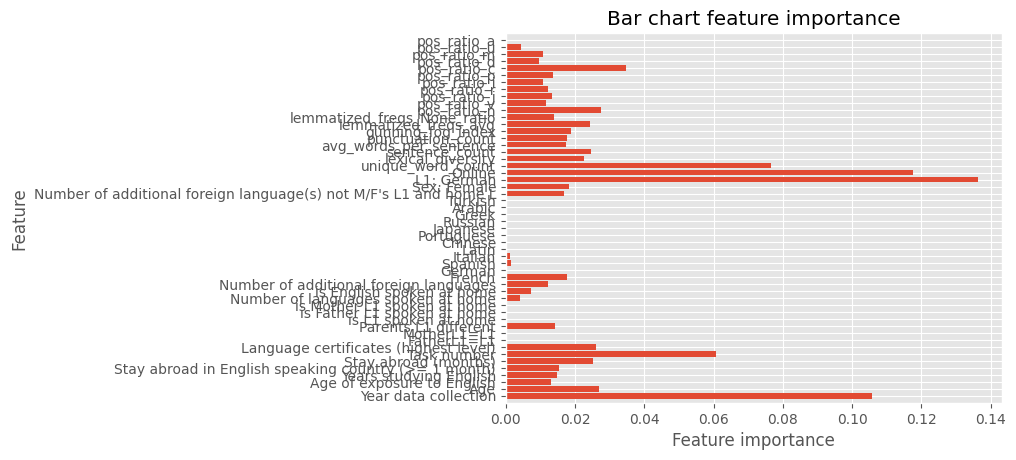

In [ ]:
#Using the best parameters I found in GridSearchCV 
#and fitting the classifiers to show the feature importances
import numpy as np
xgboost_best_parameter = xgb.XGBClassifier(objective='multi:softmax', max_depth=4, learning_rate=0.1, n_estimators=20, subsample=0.6)
xgboost_best_parameter.fit(X_train, y_train_multiclass)


#Making the function
def plot_feature_importances(classifier):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), classifier.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.title("Bar chart feature importance")
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

#tree_best_parameter = 
#Making the bar plots
plot_feature_importances(xgboost_best_parameter)
plt.xlabel("Feature importance")

## Further Analysis

### Select text features

In [ ]:
workable_data = pd.read_csv('workable_data.csv')
workable_data.head(5)

Year data collection  Placement test score (%)  Proficiency   Age  \
0                  2016                      50.0            3  26.0   
1                  2016                      61.7            3  19.0   
2                  2016                      61.7            3  21.0   
3                  2016                      61.7            3  22.0   
4                  2018                      63.3            3  33.0   

   Age of exposure to English  Years studying English  \
0                         8.0                    13.0   
1                        10.0                    11.0   
2                         9.0                    12.0   
3                         7.0                    15.0   
4                        10.0                    10.0   

   Stay abroad in English speaking country (>= 1 month)  Stay abroad (months)  \
0                                                  0                      0.0   
1                                                  0                      0.0   
2                                                  0                      0.0   
3                                                  0                      0.0   
4                                                  0                      0.0   

   Proficiency (self-assessment) speaking  \
0                                     3.0   
1                                     2.0   
2                                     4.0   
3                                     4.0   
4                                     4.0   

   Proficiency (self-assessment) listening  ...  pos_ratio_v  pos_ratio_j  \
0                                      3.0  ...     0.283333     0.050000   
1                                      2.0  ...     0.216216     0.067568   
2                                      4.0  ...     0.224490     0.071429   
3                                      4.0  ...     0.223529     0.082353   
4                                      4.0  ...     0.254658     0.062112   

   pos_ratio_r  pos_ratio_i  pos_ratio_p  pos_ratio_c  pos_ratio_d  \
0     0.033333     0.133333     0.050000     0.050000     0.033333   
1     0.121622     0.094595     0.067568     0.040541     0.040541   
2     0.112245     0.122449     0.071429     0.030612     0.040816   
3     0.129412     0.105882     0.070588     0.035294     0.047059   
4     0.111801     0.111801     0.043478     0.018634     0.049689   

   pos_ratio_m  pos_ratio_u  pos_ratio_a  
0     0.000000          0.0          0.0  
1     0.013514          0.0          0.0  
2     0.000000          0.0          0.0  
3     0.000000          0.0          0.0  
4     0.012422          0.0          0.0  

[5 rows x 63 columns]

In [ ]:
text_features = [
    'Placement test score (%)', #target
    'Age of exposure to English', 'Years studying English', 'Stay abroad (months)', 'Stay abroad in English speaking country (>= 1 month)', #Selection criterias
    'unique_word_count', 'lexical_diversity', 'sentence_count', 'avg_words_per_sentence', 'punctuation_count', 'gunning_fog_index', 'lemmatized_freqs_avg', 'lemmatized_freqs_None_ratio', 'pos_ratio_n', 'pos_ratio_v',
    'pos_ratio_j', 'pos_ratio_r', 'pos_ratio_i', 'pos_ratio_p', 'pos_ratio_c', 'pos_ratio_d', 'pos_ratio_m', 'pos_ratio_u', 'pos_ratio_a'
]

In [ ]:
three_groups = workable_data[text_features]

In [ ]:
# filter b2+ proficiency level

In [ ]:
three_groups["Placement test score (%)"] = three_groups['Placement test score (%)'].astype(int)

/tmp/ipykernel_3336/1508219911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_groups["Placement test score (%)"] = three_groups['Placement test score (%)'].astype(int)


In [ ]:
three_groups = three_groups[three_groups['Placement test score (%)'] > 50]

In [ ]:
three_groups['Placement test score (%)'] = three_groups["Placement test score (%)"] - 50 

In [ ]:
file_name = 'three_groups.csv'
three_groups.to_csv(file_name, index=False)

In [ ]:
three_groups = pd.read_csv('three_groups.csv')

### 3 Groups - Taisiia

In [ ]:
mean_age_of_exposure = workable_data['Age of exposure to English'].mean()
mean_years_studying = workable_data['Years studying English'].mean()
mean_stay_abroad = workable_data['Stay abroad (months)'].mean()

In [ ]:
mean_age_of_exposure

7.373626373626373

In [ ]:
mean_years_studying

11.773969780219781

In [ ]:
mean_stay_abroad

3.060542582417582

In [ ]:
age_exp = three_groups[three_groups['Age of exposure to English'] < mean_age_of_exposure].drop(columns=["Years studying English", 'Stay abroad (months)', 'Stay abroad in English speaking country (>= 1 month)'])

In [ ]:
years_studying_english = three_groups[three_groups['Years studying English'] > mean_years_studying].drop(columns=["Age of exposure to English", 'Stay abroad (months)', 'Stay abroad in English speaking country (>= 1 month)'])

In [ ]:
stay_abroad = three_groups[three_groups['Stay abroad (months)'] > mean_stay_abroad].drop(columns=['Years studying English', "Age of exposure to English", 'Stay abroad in English speaking country (>= 1 month)'])

#### Distributions

##### Age exp

In [9]:
sns.histplot(age_exp['Age of exposure to English'], kde=False, bins=7)
plt.title('Age of exposure below mean')
plt.show()

NameError: name 'age_exp' is not defined

In [ ]:
age_exp['Age of exposure to English'].mean()

5.421841541755889

In [ ]:
workable_data[workable_data['Age of exposure to English'] < mean_age_of_exposure]['L1: German'].value_counts()

L1: German
0    786
1     57
Name: count, dtype: int64

In [ ]:
workable_data[workable_data['Age of exposure to English'] < mean_age_of_exposure]['L1: German'].value_counts(normalize=True)

L1: German
0    0.932384
1    0.067616
Name: proportion, dtype: float64

##### Years studying

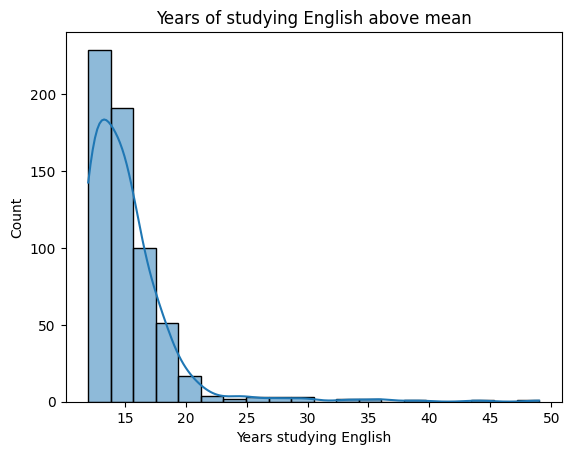

In [ ]:
sns.histplot(years_studying_english['Years studying English'], kde=True, bins=20)
plt.title('Years of studying English above mean')
plt.show()

In [ ]:
years_studying_english['Years studying English'].mean()

15.105409836065572

In [ ]:
workable_data[workable_data['Years studying English'] < mean_years_studying]['L1: German'].value_counts()

L1: German
0    606
1    102
Name: count, dtype: int64

In [ ]:
workable_data[workable_data['Years studying English'] < mean_years_studying]['L1: German'].value_counts(normalize=True)

L1: German
0    0.855932
1    0.144068
Name: proportion, dtype: float64

##### Stay abroad

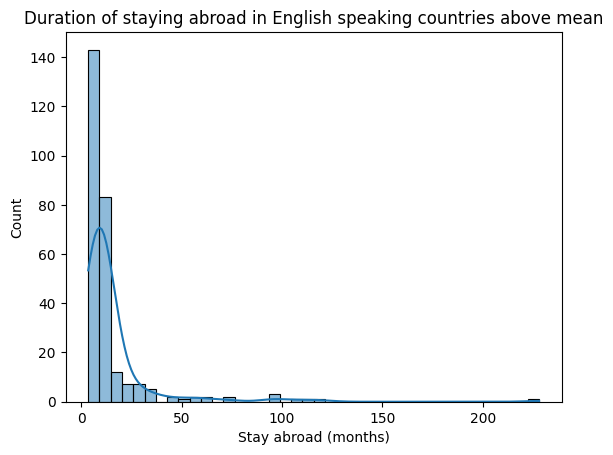

In [ ]:
sns.histplot(stay_abroad['Stay abroad (months)'], kde=True, bins=40)
plt.title('Duration of staying abroad in English speaking countries above mean')
plt.show()

In [ ]:
stay_abroad['Stay abroad (months)'].mean()

15.02014652014652

In [ ]:
workable_data[workable_data['Stay abroad (months)'] > mean_stay_abroad]['L1: German'].value_counts()

L1: German
0    186
1    102
Name: count, dtype: int64

In [ ]:
workable_data[workable_data['Stay abroad (months)'] > mean_stay_abroad]['L1: German'].value_counts(normalize=True)

L1: German
0    0.645833
1    0.354167
Name: proportion, dtype: float64

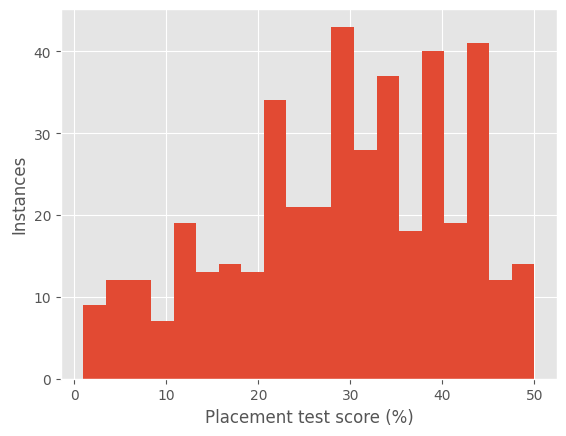

In [ ]:
# Getting X and y
X = age_exp.drop('Placement test score (%)', axis=1)
y = age_exp['Placement test score (%)']

import matplotlib.pyplot as plt
%matplotlib inline

# Plotting the target variable Proficiency
plt.style.use("ggplot")
plt.hist(x=y, bins=20)
plt.xlabel('Placement test score (%)')
plt.ylabel("Instances")
plt.show()

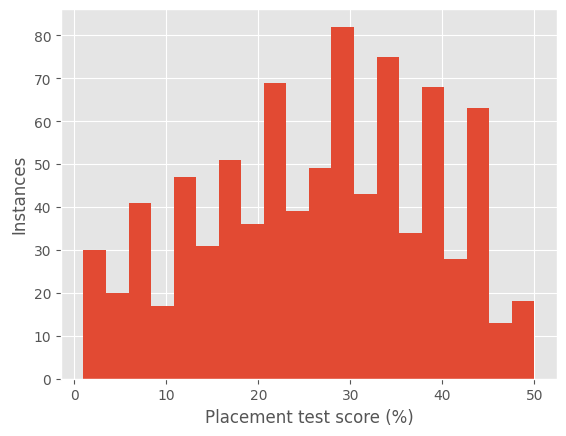

In [ ]:
# Getting X and y
X = years_studying_english.drop('Placement test score (%)', axis=1)
y = years_studying_english['Placement test score (%)']

import matplotlib.pyplot as plt
%matplotlib inline

# Plotting the target variable Proficiency
plt.style.use("ggplot")
plt.hist(x=y, bins=20)
plt.xlabel('Placement test score (%)')
plt.ylabel("Instances")
plt.show()

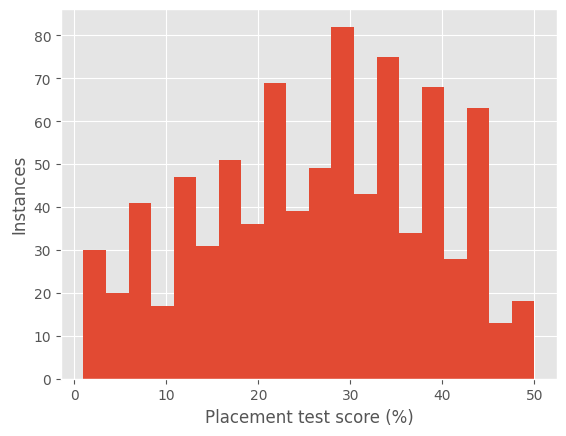

In [ ]:
# Getting X and y
X = stay_abroad.drop('Placement test score (%)', axis=1)
y = stay_abroad['Placement test score (%)']

import matplotlib.pyplot as plt
%matplotlib inline

# Plotting the target variable Proficiency
plt.style.use("ggplot")
plt.hist(x=y, bins=20)
plt.xlabel('Placement test score (%)')
plt.ylabel("Instances")
plt.show()

In [ ]:
# Making the modified function
from sklearn.preprocessing import LabelEncoder

# For Age of exposure to English
X1 = age_exp.drop('Placement test score (%)', axis=1)
y1 = age_exp['Placement test score (%)']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=0, test_size=0.1)

# For Years studying English
X2 = years_studying_english.drop('Placement test score (%)', axis=1)
y2 = years_studying_english['Placement test score (%)']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=0, test_size=0.1)

# For Stay abroad (months)
X3 = stay_abroad.drop('Placement test score (%)', axis=1)
y3 = stay_abroad['Placement test score (%)']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, random_state=0, test_size=0.1)

# For Stay abroad (months)
X4 = three_groups.drop('Placement test score (%)', axis=1)
y4 = three_groups['Placement test score (%)']


X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, random_state=0, test_size=0.1)

def plot_feature_importances(classifier, X_train):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), classifier.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.title("Bar chart feature importance")
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

# Making the bar plots

# For Age of exposure to English
xgboost_best_parameter.fit(X_train1, y_train1)
plot_feature_importances(xgboost_best_parameter, X_train1)
plt.xlabel("Feature importance")
plt.title("Feature Importance for Age of exposure to English")
plt.show()

# For Years studying English
xgboost_best_parameter.fit(X_train2, y_train2)
plot_feature_importances(xgboost_best_parameter, X_train2)
plt.xlabel("Feature importance")
plt.title("Feature Importance for Years studying English")
plt.show()

# For Stay abroad (months)
xgboost_best_parameter.fit(X_train3, y_train3)
plot_feature_importances(xgboost_best_parameter, X_train3)
plt.xlabel("Feature importance")
plt.title("Feature Importance for Stay abroad (months)")
plt.show()

# Importance distribution among users with high English proficiency
y_train_encoded1 = label_encoder.fit_transform(y_train4)
xgboost_best_parameter.fit(X_train4, y_train_encoded1)
plot_feature_importances(xgboost_best_parameter, X_train4)
plt.xlabel("Feature importance")
plt.title("Feature Importance for high level proficiency")
plt.show()

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36], got [ 1  3  4  5  6  8 10 11 13 14 15 16 17 18 19 20 21 23 24 25 26 27 28 30
 31 32 33 35 36 38 40 41 43 45 46 48 50]

## Discussion of results

### DecisionTreeClassifier and xgboost - Michelle

### PCA, covariance, correlation - Dani

### 3 groups - Taissia 